In [792]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns
sns.set()

import matplotlib
import matplotlib.ticker
import matplotlib.pyplot as plt
from matplotlib import rcParams

import string

from stop_words import get_stop_words   # or we can use from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize # it turn text to list but more faster 

import nltk
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

from textblob import TextBlob
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [793]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_context(
"notebook", font_scale=1.5, rc={"figure.figsize": (8, 5), "axes.titlesize": 14}
)
rcParams["figure.figsize"] = 8, 5

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

In [794]:
DATA_PATH = "../data/ba_reviews.csv"

In [795]:
reviews = pd.read_csv(DATA_PATH)

In [796]:
reviews

Rating                                  Review Title                Date  \
0         9                         happy to recommend BA      18th June 2024   
1         2                  cancelled our return flight"      18th June 2024   
2         8                Very good experience all round      17th June 2024   
3         7   inflight service was efficient and friendly      17th June 2024   
4         1                 worst airline I’ve ever flown      16th June 2024   
...     ...                                           ...                 ...   
3855      1                 ritish Airways customer revie    29th August 2012   
3856      9                 ritish Airways customer revie    28th August 2012   
3857      5                 ritish Airways customer revie   12th October 2011   
3858      4                 ritish Airways customer revie   11th October 2011   
3859      4                 ritish Airways customer revie    9th October 2011   

                                                Reviews  
0      ✅ Trip Verified |  Four very pleasant on time...  
1      Not Verified |   We travel extensively over 2...  
2      ✅ Trip Verified |  Flight delayed an hour due...  
3      ✅ Trip Verified |  A very full flight made Pr...  
4      ✅ Trip Verified | The worst airline I’ve ever...  
...                                                 ...  
3855   This was a bmi Regional operated flight on a ...  
3856   LHR to HAM. Purser addresses all club passeng...  
3857   My son who had worked for British Airways urg...  
3858   London City-New York JFK via Shannon on A318 ...  
3859   SIN-LHR BA12 B747-436 First Class. Old aircra...  

[3860 rows x 4 columns]

In [797]:
reviews.columns

Index(['Rating', ' Review Title', ' Date', ' Reviews'], dtype='object')

In [798]:
def remove_white_space(column):
    return column.strip()

reviews = reviews.rename(columns=remove_white_space)

In [799]:
reviews.columns

Index(['Rating', 'Review Title', 'Date', 'Reviews'], dtype='object')

In [800]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3860 entries, 0 to 3859
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rating        3846 non-null   object
 1   Review Title  3829 non-null   object
 2   Date          3815 non-null   object
 3   Reviews       3801 non-null   object
dtypes: object(4)
memory usage: 120.8+ KB


### Handling null values

In [801]:
print(reviews.isnull().sum())

Rating          14
Review Title    31
Date            45
Reviews         59
dtype: int64


In [802]:
reviews[reviews['Rating'].isnull()]

Rating         Review Title  \
907     NaN     23rd August 2019   
947     NaN       20th July 2019   
1118    NaN    23rd January 2019   
1163    NaN    9th December 2018   
1210    NaN     1st October 2018   
1282    NaN       15th July 2018   
1304    NaN       22nd June 2018   
1379    NaN      13th April 2018   
1425    NaN   22nd February 2018   
1427    NaN   22nd February 2018   
1429    NaN   21st February 2018   
1445    NaN    5th February 2018   
1494    NaN   10th December 2017   
1534    NaN   17th November 2017   

                                                   Date Reviews  
907    ✅ Trip Verified | My flight was cancelled 3 d...     NaN  
947    ✅ Trip Verified |  I flew yesterday from Heat...     NaN  
1118   ✅ Trip Verified |  Antigua to Gatwick. Appare...     NaN  
1163                                 ✅ Trip Verified |      NaN  
1210   ✅ Trip Verified |  London to Bangkok. Flew Br...     NaN  
1282   ✅ Trip Verified |  Munich to London Heathrow ...     NaN  
1304   ✅ Trip Verified | We can not fault the new 'C...     NaN  
1379   ✅ Trip Verified | Flew Belfast to London with...     NaN  
1425   ✅ Trip Verified | Could British Airways get a...     NaN  
1427   ✅ Trip Verified | Flew on British Airways fro...     NaN  
1429   ✅ Trip Verified | The best thing about this f...     NaN  
1445   ✅ Trip Verified | I had booked business class...     NaN  
1494   ✅ Trip Verified | Flew British Airways to Pis...     NaN  
1534                              ✅ Verified Review |       NaN

In [803]:
reviews.shape

(3860, 4)

In [804]:
reviews['Rating'] = pd.to_numeric(reviews['Rating'], errors="coerce")

In [805]:
mask = reviews[reviews['Rating'].isnull()]

# removing rows with missing rating value
reviews = reviews.drop(mask.index)

In [806]:
reviews.shape

(3815, 4)

In [807]:
reviews

Rating                                  Review Title  \
0        9.0                         happy to recommend BA   
1        2.0                  cancelled our return flight"   
2        8.0                Very good experience all round   
3        7.0   inflight service was efficient and friendly   
4        1.0                 worst airline I’ve ever flown   
...      ...                                           ...   
3855     1.0                 ritish Airways customer revie   
3856     9.0                 ritish Airways customer revie   
3857     5.0                 ritish Airways customer revie   
3858     4.0                 ritish Airways customer revie   
3859     4.0                 ritish Airways customer revie   

                    Date                                            Reviews  
0         18th June 2024   ✅ Trip Verified |  Four very pleasant on time...  
1         18th June 2024   Not Verified |   We travel extensively over 2...  
2         17th June 2024   ✅ Trip Verified |  Flight delayed an hour due...  
3         17th June 2024   ✅ Trip Verified |  A very full flight made Pr...  
4         16th June 2024   ✅ Trip Verified | The worst airline I’ve ever...  
...                  ...                                                ...  
3855    29th August 2012   This was a bmi Regional operated flight on a ...  
3856    28th August 2012   LHR to HAM. Purser addresses all club passeng...  
3857   12th October 2011   My son who had worked for British Airways urg...  
3858   11th October 2011   London City-New York JFK via Shannon on A318 ...  
3859    9th October 2011   SIN-LHR BA12 B747-436 First Class. Old aircra...  

[3815 rows x 4 columns]

In [808]:
reviews.isnull().sum()

Rating           0
Review Title     0
Date            14
Reviews         14
dtype: int64

In [809]:
reviews[reviews['Reviews'].isnull()]

Rating                                  Review Title Date Reviews
906      1.0         flight was cancelled 3 days in a row"  NaN     NaN
946      3.0               sent to the wrong baggage drop"  NaN     NaN
1117     3.0             bothered by the adjacent toilets"  NaN     NaN
1162    10.0                      a very enjoyable flight"  NaN     NaN
1209     2.0                    aircraft interior was old"  NaN     NaN
1281     7.0                   crew welcoming and orderly"  NaN     NaN
1303    10.0          worlds away from what it used to be"  NaN     NaN
1378     1.0               started with a 2.5 hours delay"  NaN     NaN
1424     1.0                at least a decade out of date"  NaN     NaN
1426     7.0   has adopted the low cost airline mentality"  NaN     NaN
1428     4.0                meals were served very slowly"  NaN     NaN
1444     2.0                             I was downgraded"  NaN     NaN
1493     1.0                 a poor economy class product"  NaN     NaN
1533     3.0           a functional disinterested service"  NaN     NaN

In [810]:
mask = reviews[reviews['Reviews'].isnull()]

# removing rows with missing rating value
reviews = reviews.drop(mask.index)

In [811]:
reviews.shape

(3801, 4)

In [812]:
reviews.isnull().sum()

Rating          0
Review Title    0
Date            0
Reviews         0
dtype: int64

### Data processing

In [813]:
reviews[reviews['Review Title'].str[-1] == '"']

Rating                                      Review Title  \
1        2.0                      cancelled our return flight"   
23       2.0                   declined to offer compensation"   
29       1.0                             the worst experience"   
37       8.0                           a really lovely flight"   
40       5.0                        I would say disappointing"   
47       3.0                       They have a long way to go"   
50       1.0                      cancelled our return flight"   
52       1.0                    Service extremely inattentive"   
57      10.0                          an excellent experience"   
64       3.0                   Is this how low BA has fallen?"   
71       9.0                            no great expectations"   
76       6.0            unprofessional attitude of the pilots"   
82       4.0            baggage arrival nearly took 1.5 hours"   
84       1.0                      airline is a total disgrace"   
104      9.0                            Service was fantastic"   
105      9.0                        it was a very nice flight"   
110      1.0              such a terrible customer experience"   
129      7.0                       I would still recommend BA"   
131      8.0                       an exceptional crew member"   
138      5.0         2½ hours before the bags finally arrived"   
143      1.0                                   Never again BA"   
144      2.0                            BA Gatwick are not BA"   
145      1.0                     Boarding flight took an hour"   
152      2.0                       won the race to the bottom"   
159      1.0               never fly this awful airline again"   
162      1.0                      everyone refused to help us"   
184      3.0                    standards are worse than ever"   
198      1.0                           leaving two hours late"   
199      1.0                                flight is delayed"   
216      1.0                                  Not recommended"   
235      4.0                                 WiFi didn't work"   
254      3.0                      luggage was still in London"   
266      2.0                 the worst major European airline"   
278      1.0                               Avoid this airline"   
305     10.0                           Service was impeccable"   
345      1.0                     found the attitude appalling"   
367      1.0                               Luggage is delayed"   
428     10.0                          Couldn’t fault anything"   
444     10.0                           staff were so friendly"   
1324     1.0                          nearly three hours late"   
1416     1.0                           don't have spare water"   
1464     9.0                  impressed with level of service"   
1728     4.0                           Leg room was atrocious"   
1968     1.0                     food had no taste whatsoever"   
2895     5.0   Problem is how inconsistent British Airways is"   

                      Date                                            Reviews  
1           18th June 2024   Not Verified |   We travel extensively over 2...  
23            5th May 2024   ✅ Trip Verified |   I flew with British Airwa...  
29         20th April 2024   ✅ Trip Verified |  We booked premium economy ...  
37         28th March 2024   ✅ Trip Verified |  Starting off at Heathrow T...  
40         26th March 2024   ✅ Trip Verified |   Overall I would say disap...  
47         19th March 2024   Not Verified |   Not a great experience at al...  
50         12th March 2024   ✅ Trip Verified |  Absolutely horrible custom...  
52         10th March 2024   ✅ Trip Verified |  BA First it's not even the...  
57          2nd March 2024   ✅ Trip Verified |  I upgraded at check in to ...  
64      17th February 2024   ✅ Trip Verified |  London Heathrow to Istanbu...  
71       30th January 2024   ✅ Trip Verified |  I flew to LHR from ATH in ...  
76       

In [814]:
reviews['Review Title'] = reviews['Review Title'].str.replace('"','')

In [815]:
len(reviews[reviews['Review Title'].str[-1] == '"'])

0

In [816]:
reviews.shape

(3801, 4)

In [817]:
reviews['Rating'].value_counts()

Rating
1.0      897
2.0      434
3.0      420
8.0      381
10.0     331
9.0      321
7.0      317
4.0      257
5.0      239
6.0      199
404.0      5
Name: count, dtype: int64

In [818]:
reviews[reviews['Rating'] == 404]

Rating                    Review Title                 Date  \
3280   404.0   ritish Airways customer revie   18th February 2015   
3414   404.0   ritish Airways customer revie   10th December 2014   
3436   404.0   ritish Airways customer revie   25th November 2014   
3667   404.0   ritish Airways customer revie       31st July 2014   
3701   404.0   ritish Airways customer revie       15th July 2014   

                                                Reviews  
3280   Cabin crew polite unfortunately BA ran out of...  
3414   Phoenix to London - outbound a wonderful and ...  
3436   On past experience I chose BA for our long ha...  
3667   LHR-CPH-LHR Business Class. This is a joke. S...  
3701   I flew with British Airways with my mother fr...

In [819]:
mask = reviews[reviews['Rating'] == 404]

# removing rows with missing rating value
reviews = reviews.drop(mask.index)

In [820]:
len(reviews[reviews['Rating'] == 404])

0

### EDA

In [821]:
reviews['Rating'].value_counts()

Rating
1.0     897
2.0     434
3.0     420
8.0     381
10.0    331
9.0     321
7.0     317
4.0     257
5.0     239
6.0     199
Name: count, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

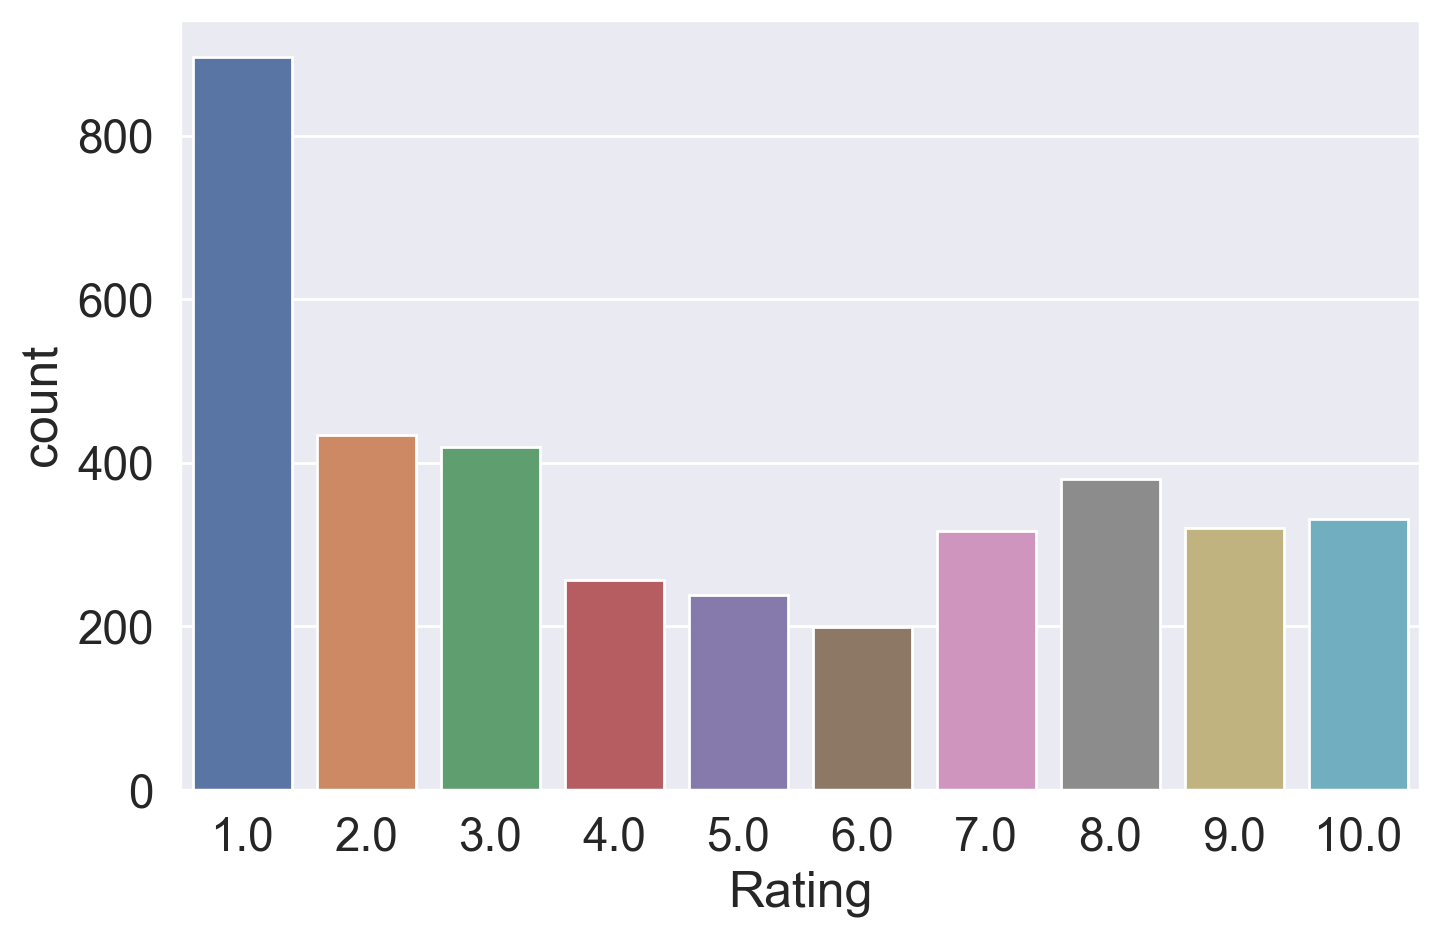

In [822]:
# Choose a plot type (adjust as needed)
sns.countplot(reviews, x="Rating", palette="deep")


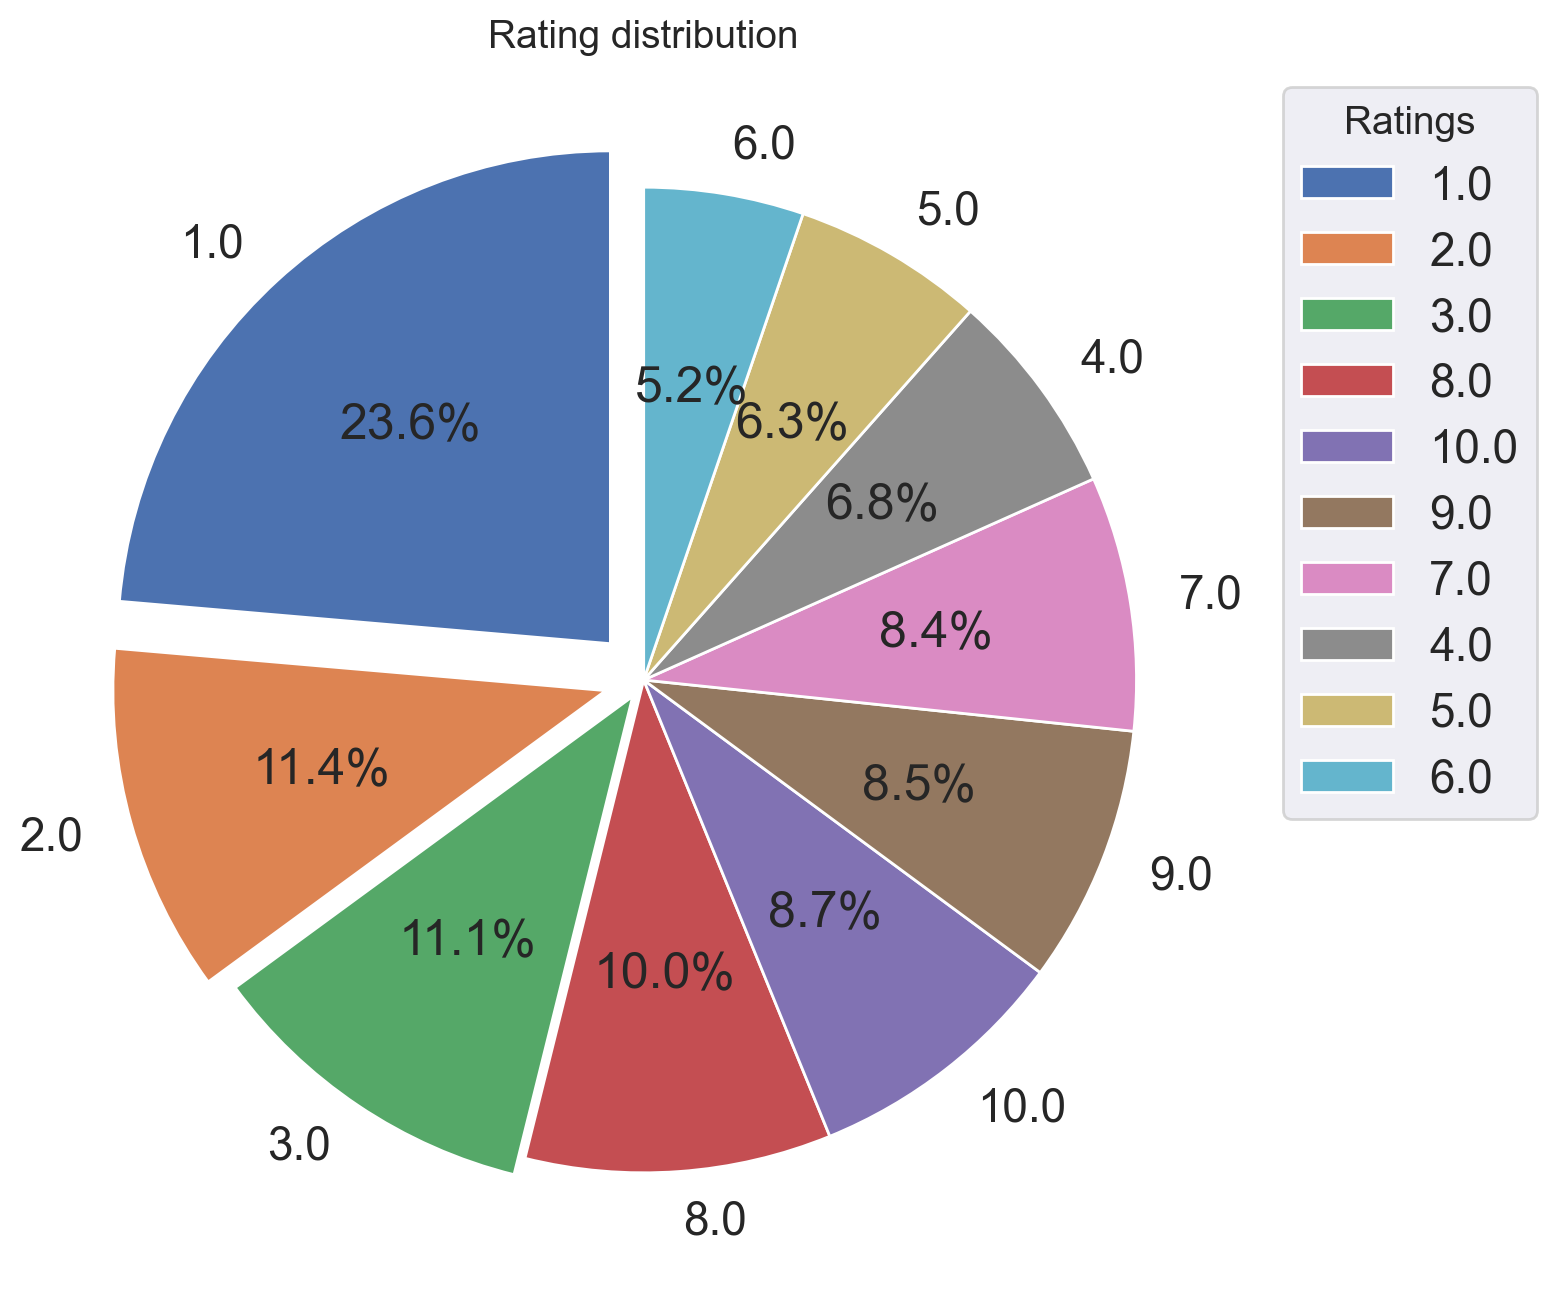

In [823]:
# explode 1st slice
explode = (0.1,0.08,0.04, 0,0,0,0,0,0,0)

labels = reviews['Rating'].value_counts().index.to_list()
plt.figure(figsize=(11, 8))
plt.title("Rating distribution")
plt.pie(reviews['Rating'].value_counts(), explode=explode, startangle=90, autopct='%1.1f%%', labels=labels)

plt.legend(labels=labels, loc="best")
plt.legend(title="Ratings", title_fontsize=14, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [824]:
reviews['Date']

0           18th June 2024
1           18th June 2024
2           17th June 2024
3           17th June 2024
4           16th June 2024
               ...        
3855      29th August 2012
3856      28th August 2012
3857     12th October 2011
3858     11th October 2011
3859      9th October 2011
Name: Date, Length: 3796, dtype: object

In [825]:
reviews['Date'] = pd.to_datetime(reviews['Date'], format='mixed')

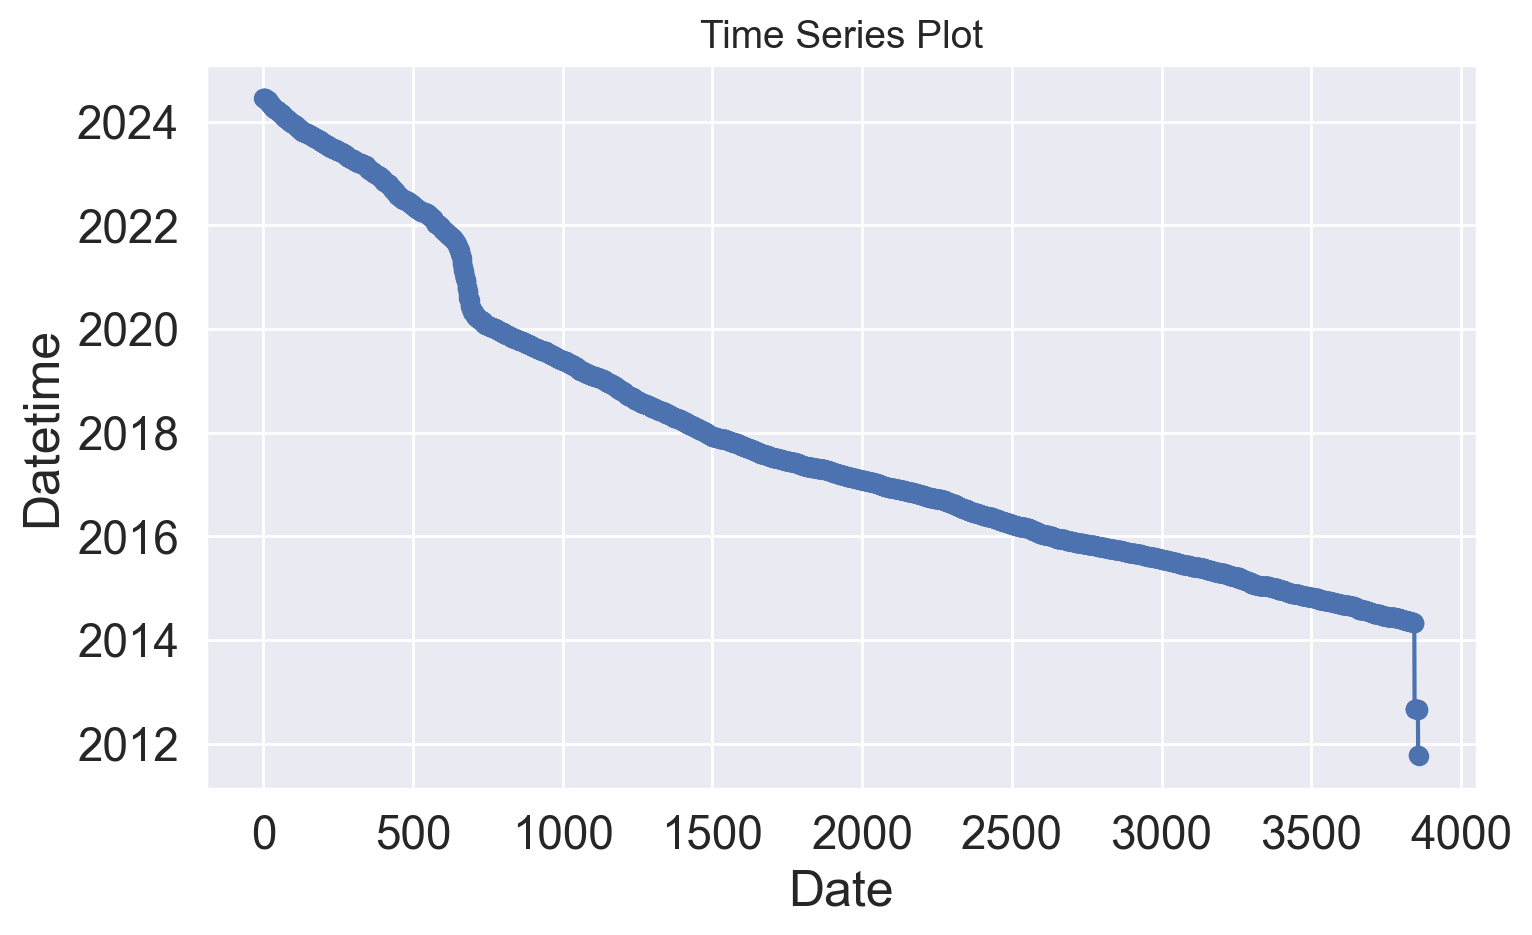

In [826]:
plt.plot(reviews['Date'], marker='o', linestyle='-')  
plt.xlabel('Date')
plt.ylabel('Datetime')
plt.title('Time Series Plot')
plt.grid(True)
plt.tight_layout() 
plt.show()

In [827]:
reviews['Year'] = reviews['Date'].dt.year

reviews['Year']

0       2024
1       2024
2       2024
3       2024
4       2024
        ... 
3855    2012
3856    2012
3857    2011
3858    2011
3859    2011
Name: Year, Length: 3796, dtype: int32

In [828]:
reviews['Year'].value_counts().sort_index()

Year
2011      3
2012     12
2014    464
2015    737
2016    570
2017    570
2018    315
2019    353
2020    104
2021     87
2022    213
2023    280
2024     88
Name: count, dtype: int64

<Axes: title={'center': 'Avg. Rating each year'}, xlabel='Year', ylabel='Rating'>

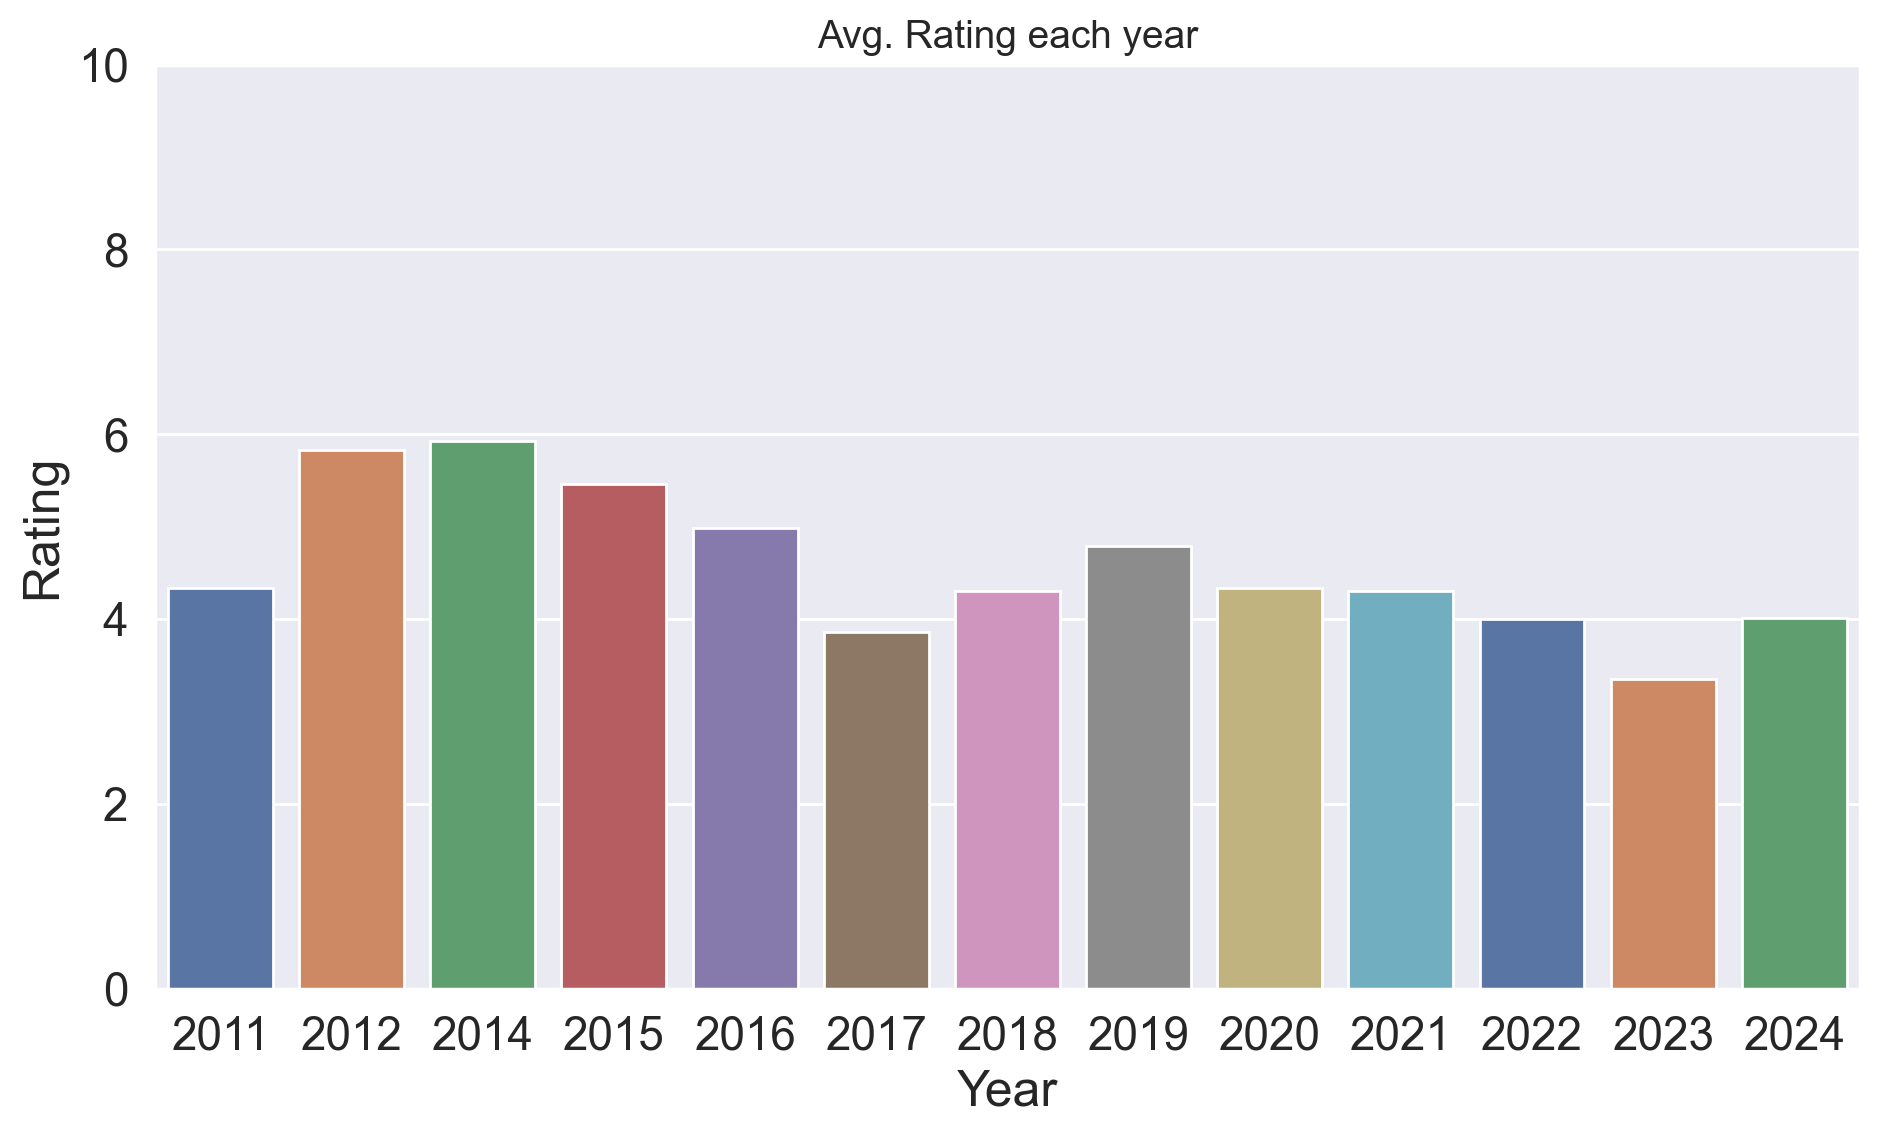

In [829]:
avg_rating_each_year = reviews.groupby("Year")[['Rating']].mean()

plt.figure(figsize=(11, 6))
plt.ylim(0, 10)
plt.title("Avg. Rating each year")
sns.barplot(data=avg_rating_each_year, x="Year", y="Rating", palette="deep")

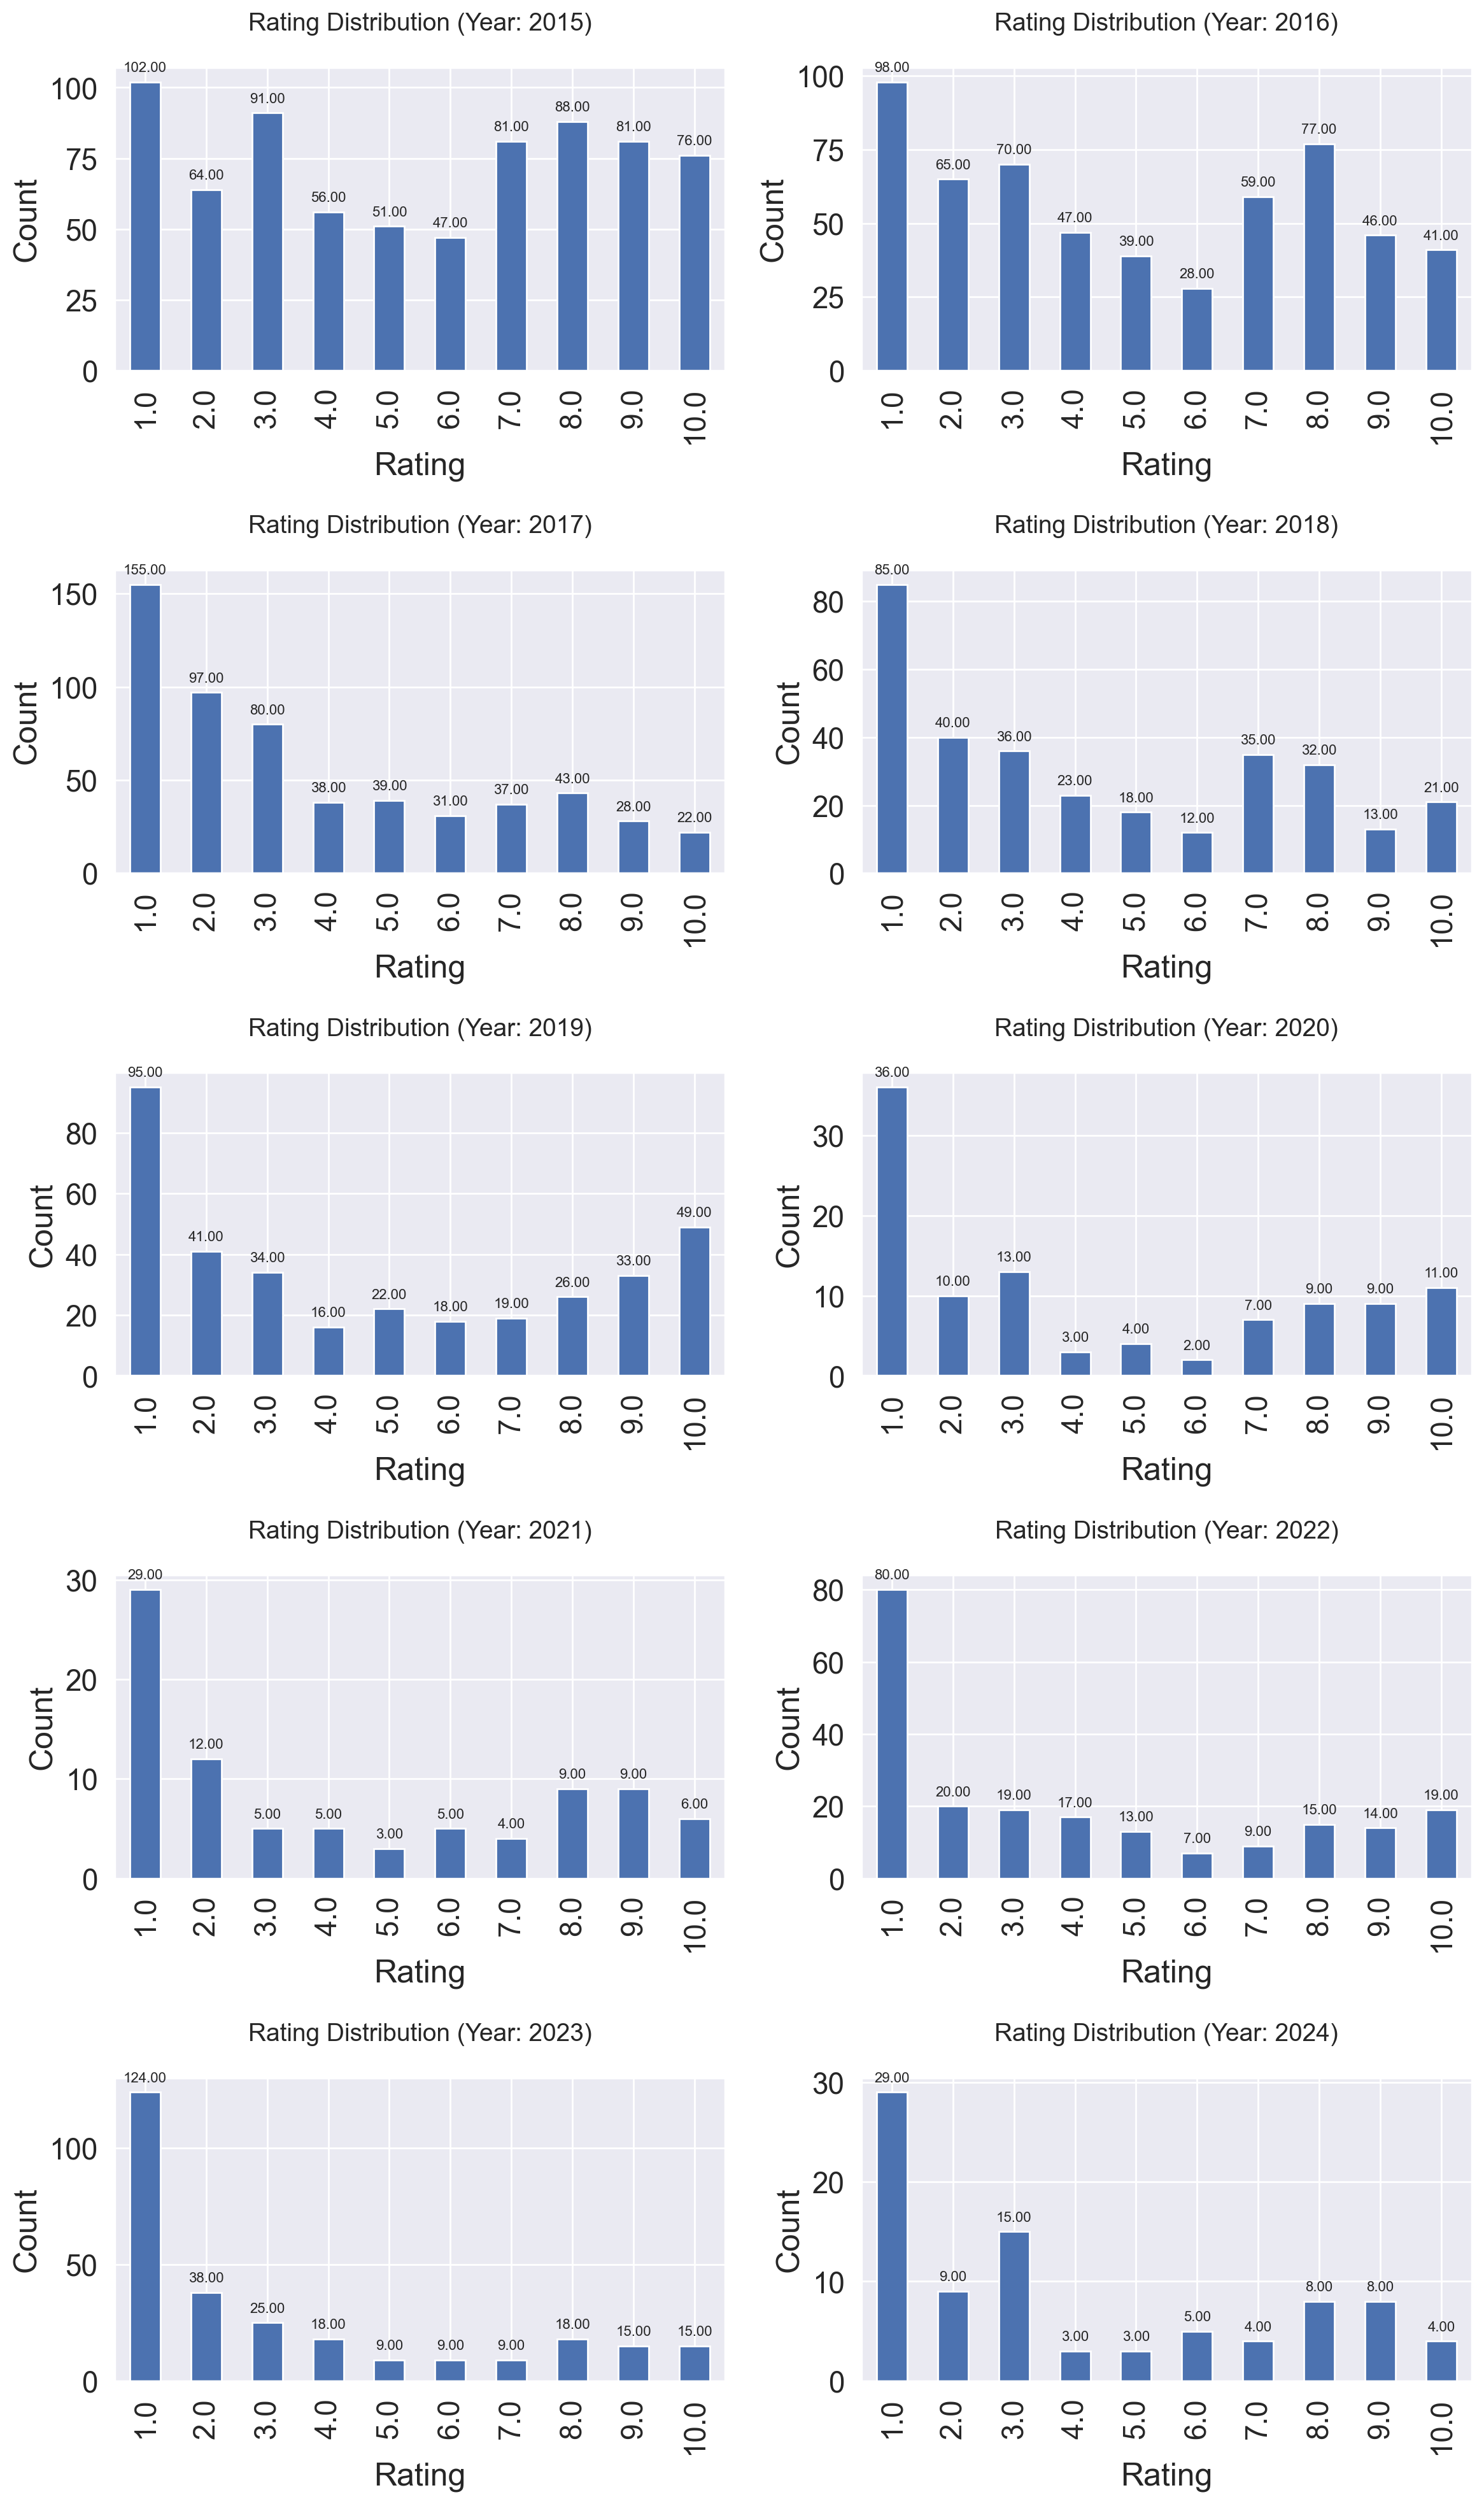

In [830]:
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

# years = [2015,2016,2017,2018,2019,2020,2021,2022,2023,2024]
years = list(range(2015,2025))

for year, ax in zip(years, axes.flat):
    df = reviews[reviews['Year'] == year]['Rating']
    year_data = df.value_counts().sort_index()
    
    labels = year_data.index.astype(str).to_list()
    plots = year_data.plot(kind='bar', ax=ax)
    
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=8, xytext=(0, 8),
                       textcoords='offset points')
    
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_title(f'Rating Distribution (Year: {year})\n' )

plt.tight_layout()


## Data Cleaning

In [831]:
reviews['Reviews']

0        ✅ Trip Verified |  Four very pleasant on time...
1        Not Verified |   We travel extensively over 2...
2        ✅ Trip Verified |  Flight delayed an hour due...
3        ✅ Trip Verified |  A very full flight made Pr...
4        ✅ Trip Verified | The worst airline I’ve ever...
                              ...                        
3855     This was a bmi Regional operated flight on a ...
3856     LHR to HAM. Purser addresses all club passeng...
3857     My son who had worked for British Airways urg...
3858     London City-New York JFK via Shannon on A318 ...
3859     SIN-LHR BA12 B747-436 First Class. Old aircra...
Name: Reviews, Length: 3796, dtype: object

In [832]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3796 entries, 0 to 3859
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rating        3796 non-null   float64       
 1   Review Title  3796 non-null   object        
 2   Date          3796 non-null   datetime64[ns]
 3   Reviews       3796 non-null   object        
 4   Year          3796 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 163.1+ KB


In [833]:
reviews.describe()

Rating                           Date         Year
count  3796.000000                           3796  3796.000000
mean      4.717597  2017-11-29 14:59:48.619599616  2017.402529
min       1.000000            2011-10-09 00:00:00  2011.000000
25%       2.000000            2015-09-04 18:00:00  2015.000000
50%       4.000000            2017-02-28 00:00:00  2017.000000
75%       8.000000            2019-07-06 06:00:00  2019.000000
max      10.000000            2024-06-18 00:00:00  2024.000000
std       3.172646                            NaN     2.869995

In [834]:
reviews['Reviews'] = reviews['Reviews'].str.strip()
reviews.head(50)

Rating                                   Review Title       Date  \
0      9.0                          happy to recommend BA 2024-06-18   
1      2.0                    cancelled our return flight 2024-06-18   
2      8.0                 Very good experience all round 2024-06-17   
3      7.0    inflight service was efficient and friendly 2024-06-17   
4      1.0                  worst airline I’ve ever flown 2024-06-16   
5      8.0                          Cabin crew were great 2024-06-15   
6      9.0                   flight itself was quite good 2024-06-10   
7      1.0                      You expect better from BA 2024-06-09   
8      1.0                      never fly British Airways 2024-06-06   
9      5.0              we will rethink BA moving forward 2024-06-03   
10     1.0                extremely poor customer service 2024-06-01   
11     9.0               a pleasant and civilized journey 2024-06-01   
12     2.0          the worst BA flight we've experienced 2024-05-31   
13     1.0                    Never again British Airways 2024-05-31   
14     1.0        only been offered half a glass of water 2024-05-30   
15     2.0         told by cabin crew I would be refunded 2024-05-29   
16     3.0            premium price for a sub-par product 2024-05-26   
17     3.0                  can't even choose my own seat 2024-05-20   
18     9.0                         Very impressed with BA 2024-05-18   
19     3.0                     appalling customer service 2024-05-14   
20     2.0             baggage customer service is a joke 2024-05-08   
21     1.0                      Worst business class ever 2024-05-08   
22     4.0               replicating the likes of Ryanair 2024-05-07   
23     2.0                 declined to offer compensation 2024-05-05   
24     6.0                 onboard like discount carriers 2024-05-01   
25     1.0                         Never using them again 2024-04-30   
26     1.0        undiscerning and insincere compensation 2024-04-27   
27     1.0                mock and insult your passengers 2024-04-25   
28     1.0                lost my luggage on both flights 2024-04-22   
29     1.0                           the worst experience 2024-04-20   
30     6.0                          The flights were okay 2024-04-12   
31     1.0           entire experience has been stressful 2024-04-10   
32     1.0                     whole experience was awful 2024-04-10   
33    10.0                           This is true service 2024-04-07   
34     7.0                    Flight attendants welcoming 2024-04-03   
35     3.0                      the service was appalling 2024-04-02   
36     4.0                service was slow and unfriendly 2024-04-02   
37     8.0                         a really lovely flight 2024-03-28   
38     1.0   travelling with British Airways so stressful 2024-03-28   
39     8.0    didn't find the crew particularly welcoming 2024-03-26   
40     5.0                      I would say disappointing 2024-03-26   
41    10.0                             Exceptional flight 2024-03-25   
42     9.0                Cabin crew attentive and bubbly 2024-03-25   
43     3.0          a terrible and unnecessary experience 2024-03-25   
44     8.0            stick to their cabin bag size limit 2024-03-21   
45     8.0                   crew were attentive friendly 2024-03-21   
46     3.0                             Utterly outrageous 2024-03-19   
47     3.0                     They have a long way to go 2024-03-19   
48     7.0                             FA's were friendly 2024-03-14   
49     3.0                   Far from pleasant experience 2024-03-14   

                                              Reviews  Year  
0   ✅ Trip Verified |  Four very pleasant on time ...  2024  
1   Not Verified |   We travel extensively over 25...  2024  
2   ✅ Trip Verified |  Flight delayed an hour due ...  2024  
3   ✅ Trip Verified |  A very full flight made Pre...  2024  
4   ✅ Trip Verified |

In [835]:
def sentiment_clean_text(text):
    if '|' in text:
        text_arr = text.split('|')[0]
        return text_arr

In [836]:
df_review_prefixes = reviews['Reviews'].apply(sentiment_clean_text)
df_review_prefixes_arr = list(df_review_prefixes.value_counts().index)[:-1]

In [837]:
df_review_prefixes_arr

['✅ Trip Verified ',
 '✅ Verified Review ',
 'Not Verified ',
 '❎ Unverified ',
 '❎ Not Verified ',
 'cNot Verified ']

In [838]:
def remove_prefix(text):
    if "|" in text:
        text = text.split('|')[1]
        return text
    else:
        return text
    

In [839]:
reviews['Reviews'] = reviews['Reviews'].apply(remove_prefix)

In [840]:
reviews['Reviews'] = reviews['Reviews'].str.lower()

In [841]:
reviews['Reviews'] = reviews['Reviews'].str.translate(str.maketrans('','',string.punctuation))

## Analysis

In [842]:
stemmings = SnowballStemmer('english')
Lemma = nltk.WordNetLemmatizer()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [843]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{'ourselves', 'those', 'been', 'am', 'ma', 'you', 'if', 'why', 'herself', 'mightn', 'during', 'what', "weren't", 'did', 'won', 'from', 'again', 'on', "should've", 'd', 'hasn', 'with', 'don', 'through', "you'll", 'didn', 'into', 'yourself', 'aren', 'theirs', "mightn't", "needn't", 'there', 'until', 'couldn', 'having', 'by', 'shouldn', 'each', 'over', 'so', 'being', 'ours', 'its', 'hadn', 'do', 'is', 'the', 'are', 'me', "shouldn't", 'who', 'itself', "haven't", 'a', 'when', 'same', 'very', 'her', "won't", 'below', "wouldn't", 'at', 'because', 'such', 'of', 'own', 'doing', "you've", 'which', "you're", 'above', 'will', 'as', 'my', 'these', 'hers', 'an', 'weren', 's', 'down', "couldn't", "wasn't", 'their', 'can', 'his', 'all', "didn't", 't', 're', 'here', 'shan', "mustn't", "she's", 'and', 'm', 'o', 'against', 'themselves', 'i', "it's", 'nor', 'whom', 'other', 'wasn', 'll', 'them', "that'll", 'was', 'to', 'myself', 'some', 'isn', 'be', 'ain', 'we', 'off', 'doesn', 'how', "hasn't", 'she', 'no

In [844]:
stop_words.remove("no")
stop_words.remove("not")

In [845]:
if stop_words in ['not','no']:
    print("Yes")
else:
    print("No")

No


In [846]:
reviews['Reviews'] = reviews['Reviews'].apply(lambda v: re.sub(',', '', v))

In [847]:
def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

reviews['Reviews'] = reviews['Reviews'].apply(remove_stop_words)

In [848]:
def remove_digits(text):
    return re.sub(r'\d','',text)

reviews['Reviews'] = reviews['Reviews'].apply(remove_digits)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [851]:
def lemmatize_word(text):
    return [Lemma.lemmatize(word) for word in word_tokenize(text)]

reviews['Reviews'] = reviews['Reviews'].apply(lemmatize_word)

In [852]:
def filtering_words_by_length(arr_of_words):
    return [word for word in arr_of_words if len(word) > 2]

reviews['Reviews'] = reviews['Reviews'].apply(lambda x: [w for w in x if len(w) > 2])


## Finding frequency of words

In [853]:
freq_dist = FreqDist()

In [854]:
df = reviews.copy()

In [855]:
def create_freq_dist(text):
    return FreqDist(text)

df['Reviews'] = df['Reviews'].apply(create_freq_dist)


In [856]:
df['Reviews']

0       {'four': 1, 'pleasant': 1, 'time': 1, 'flight'...
1       {'travel': 1, 'extensively': 1, 'year': 2, 'te...
2       {'flight': 7, 'delayed': 2, 'hour': 2, 'due': ...
3       {'full': 1, 'flight': 2, 'made': 2, 'premium':...
4       {'worst': 1, 'airline': 2, 'ever': 1, 'flown':...
                              ...                        
3855    {'bmi': 2, 'regional': 1, 'operated': 1, 'flig...
3856    {'lhr': 1, 'ham': 1, 'purser': 1, 'address': 1...
3857    {'son': 1, 'worked': 1, 'british': 2, 'airway'...
3858    {'london': 1, 'citynew': 1, 'york': 1, 'jfk': ...
3859    {'sinlhr': 1, 'first': 1, 'class': 1, 'old': 1...
Name: Reviews, Length: 3796, dtype: object

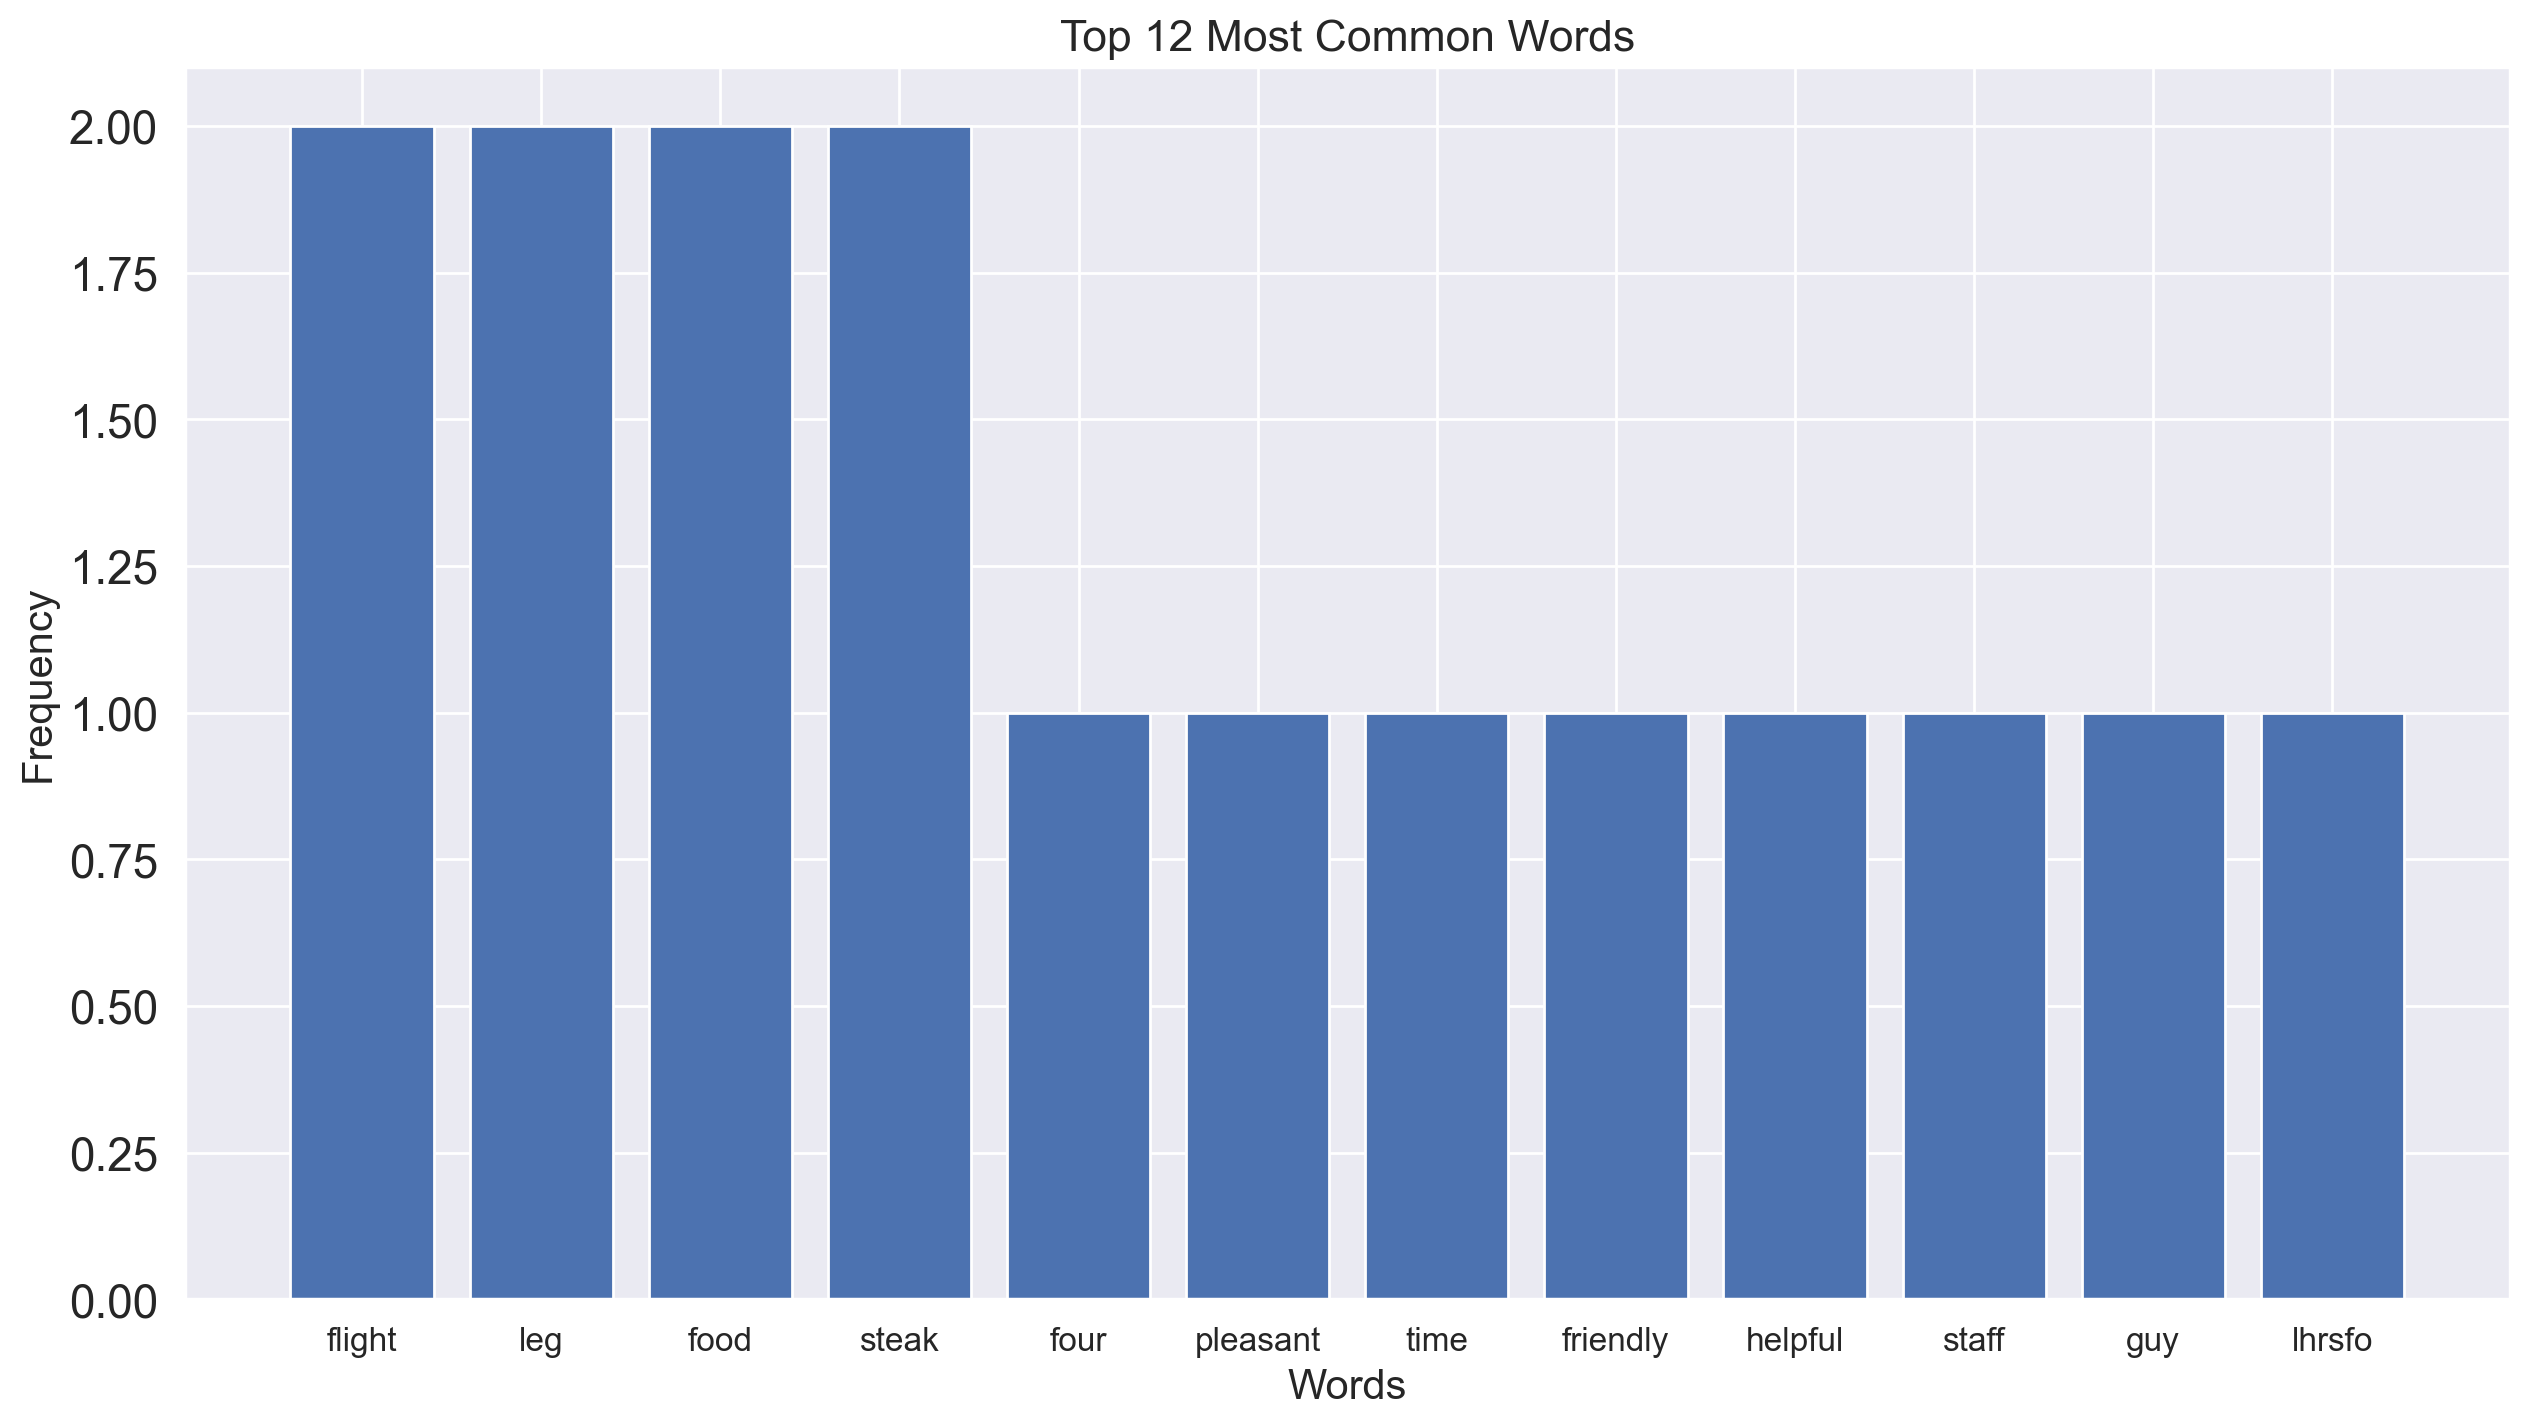

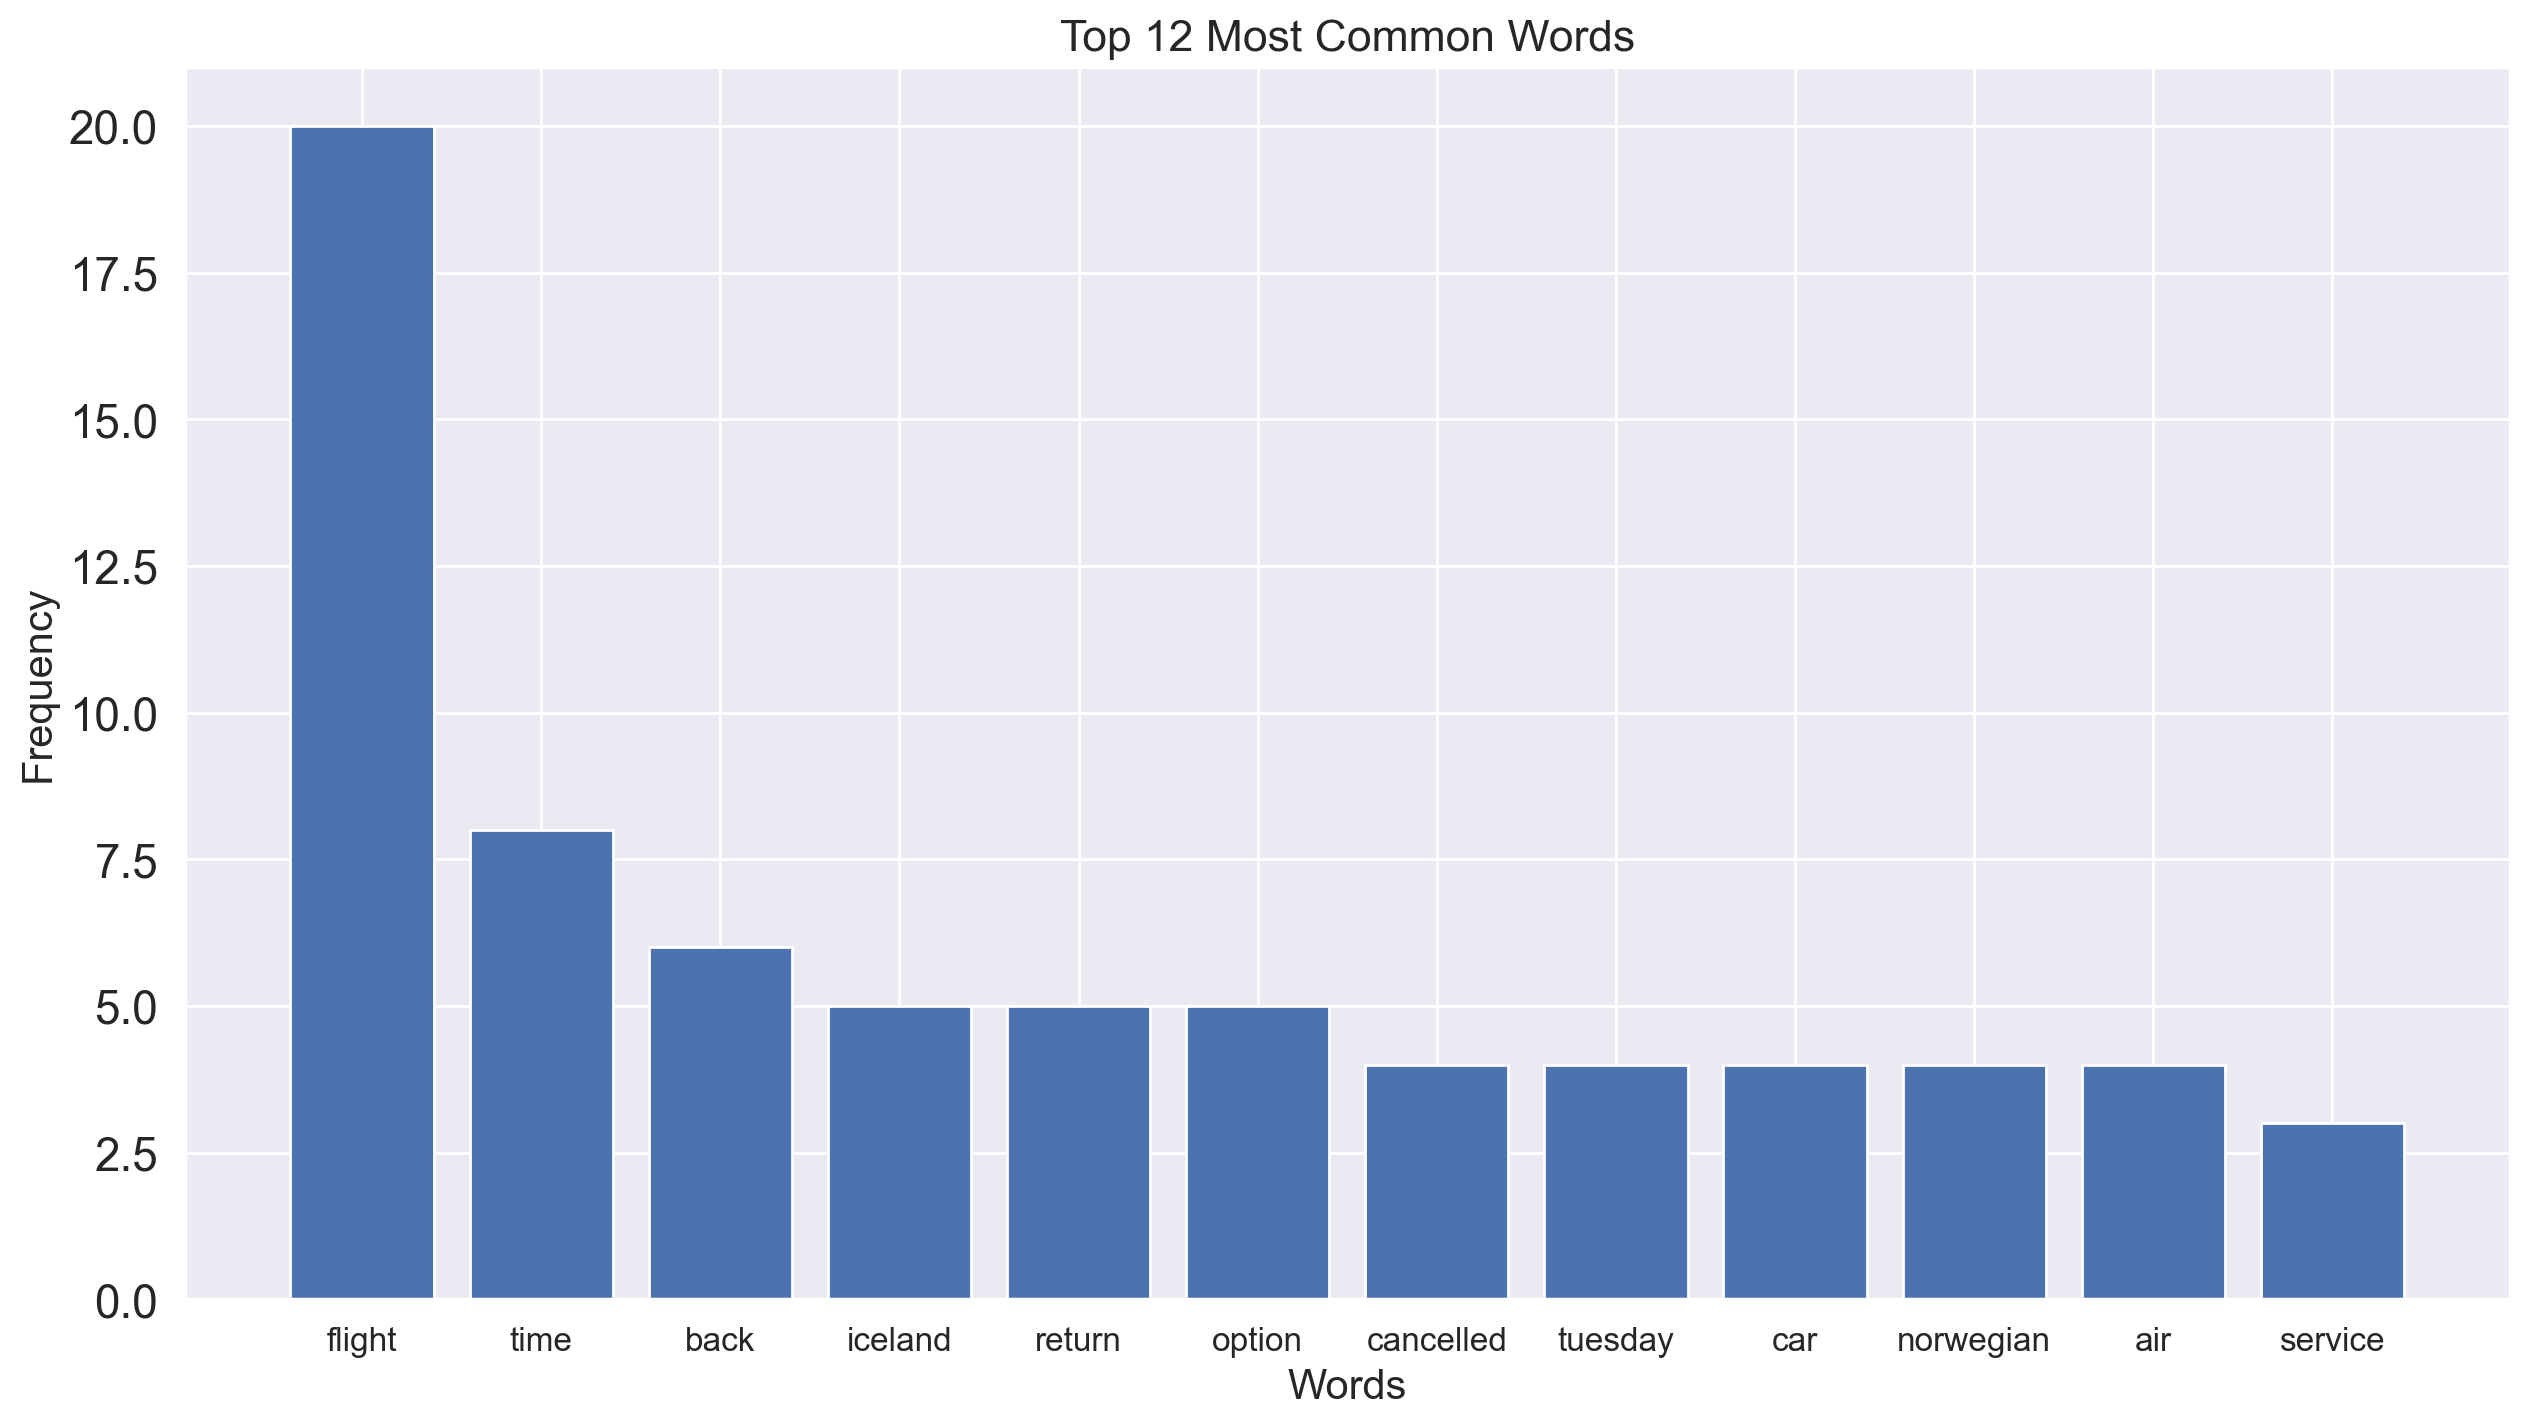

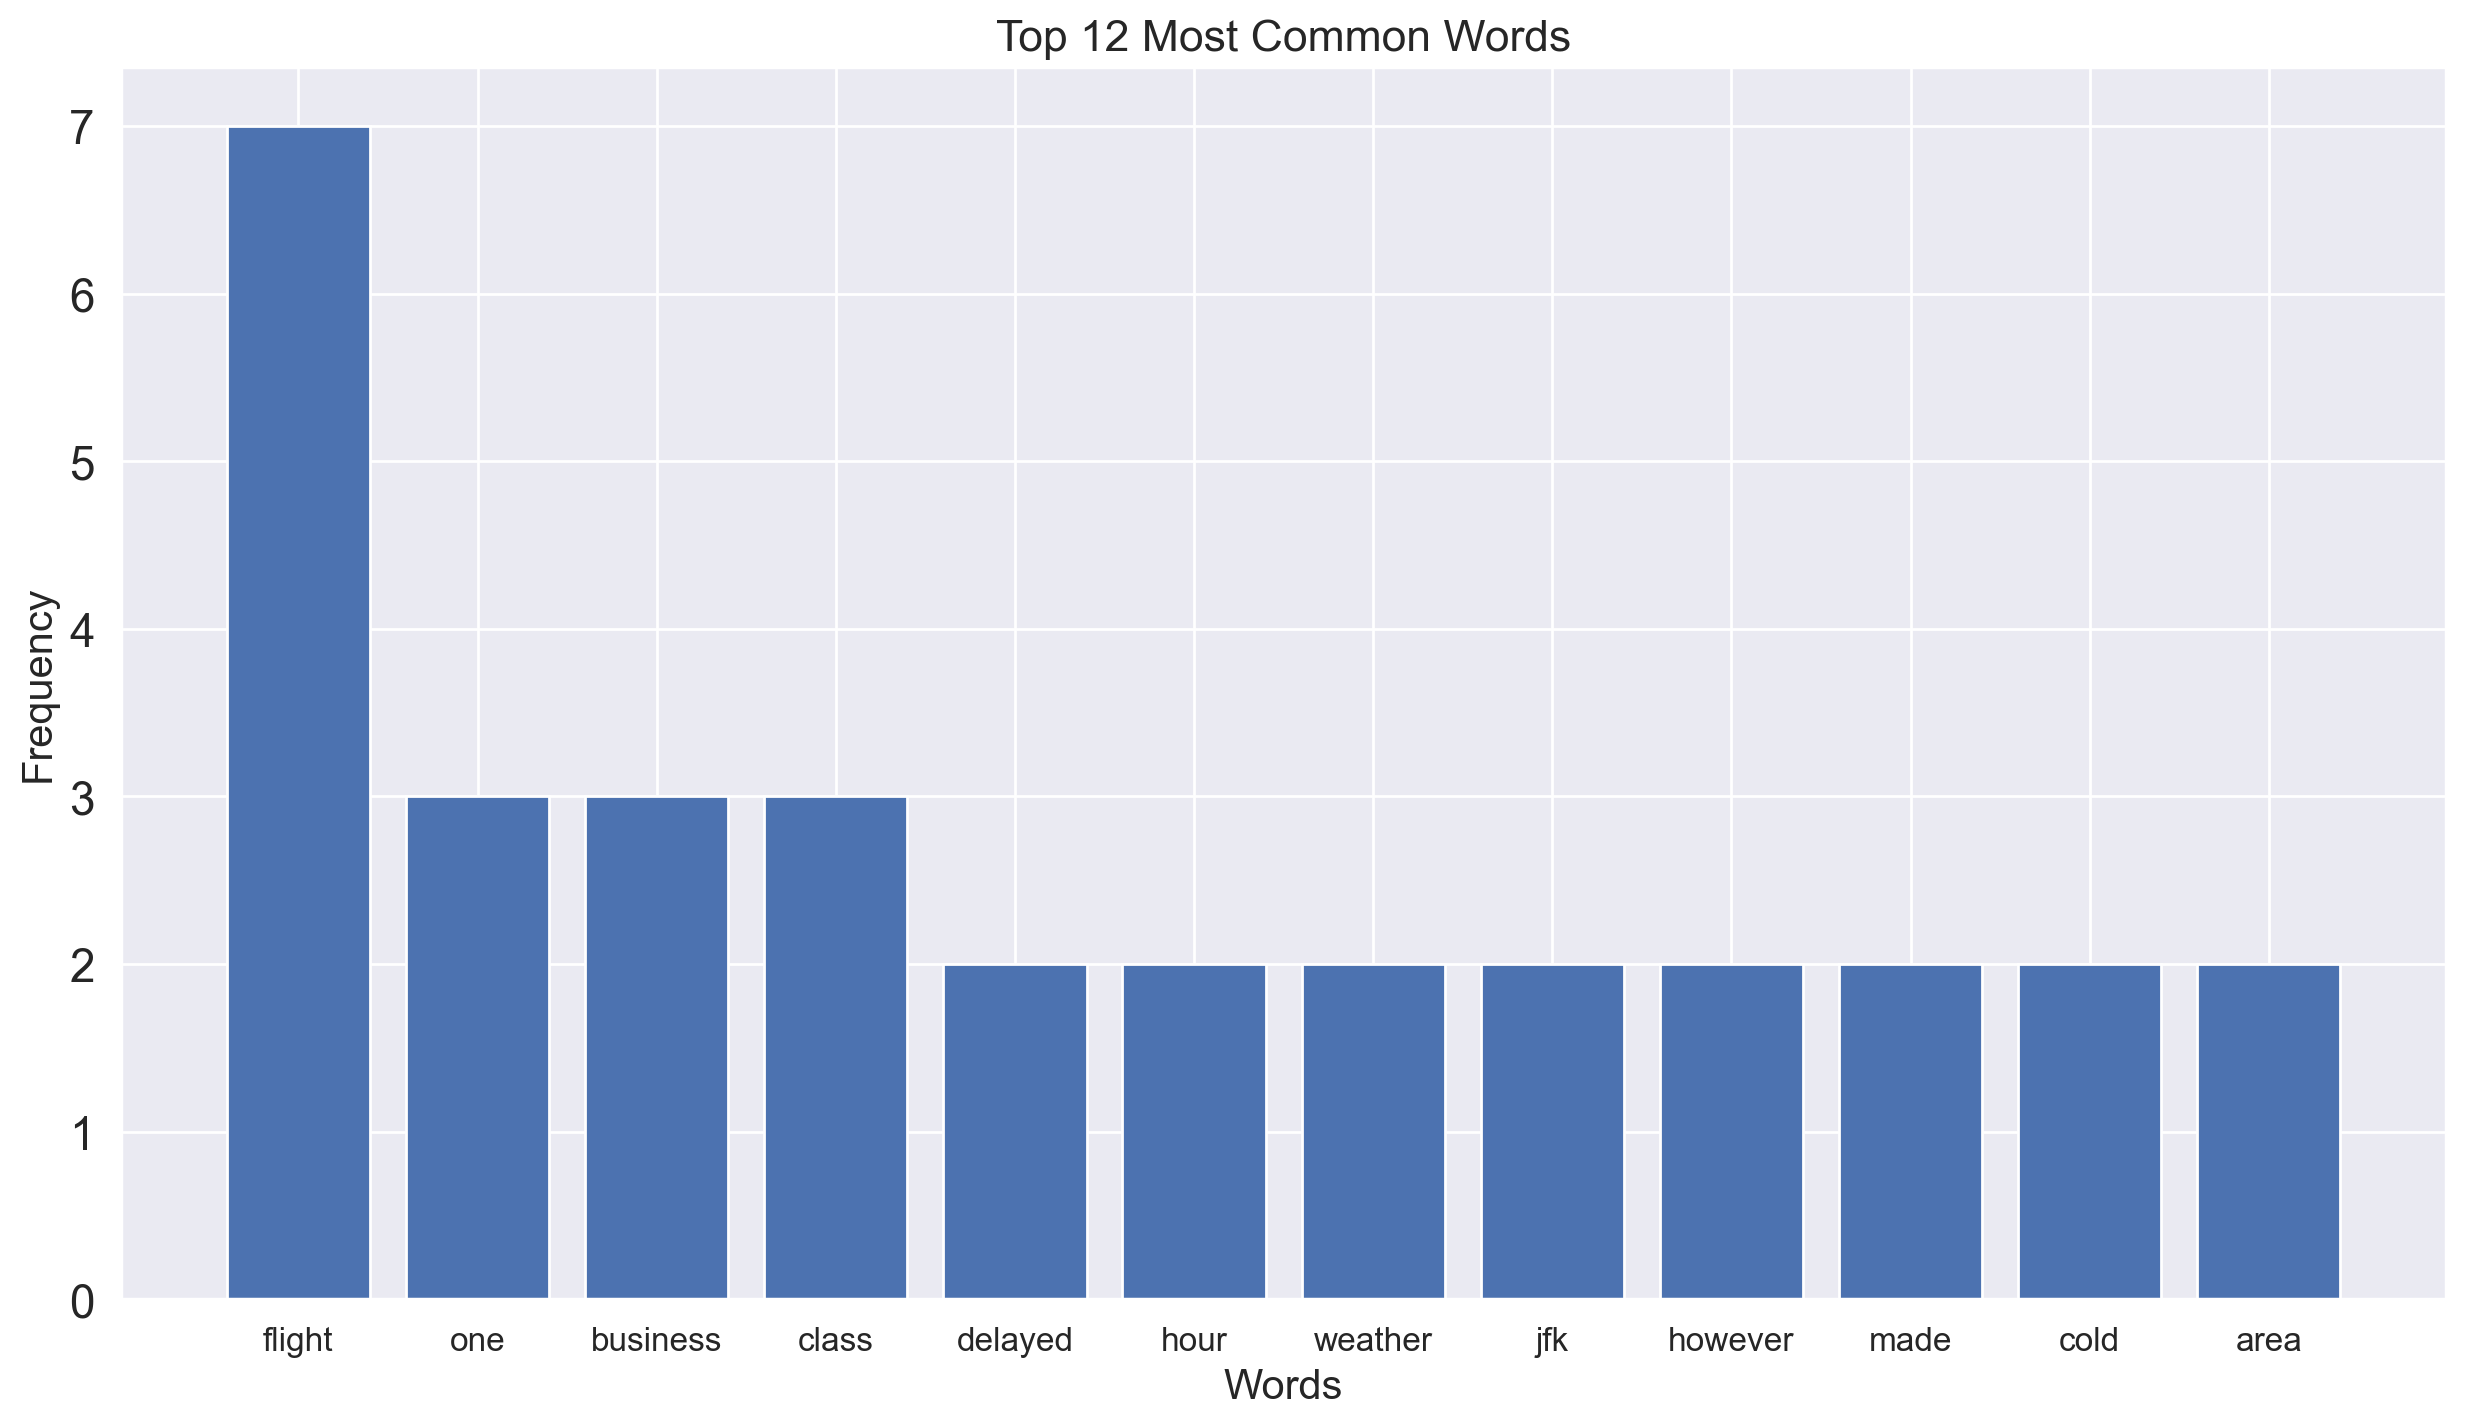

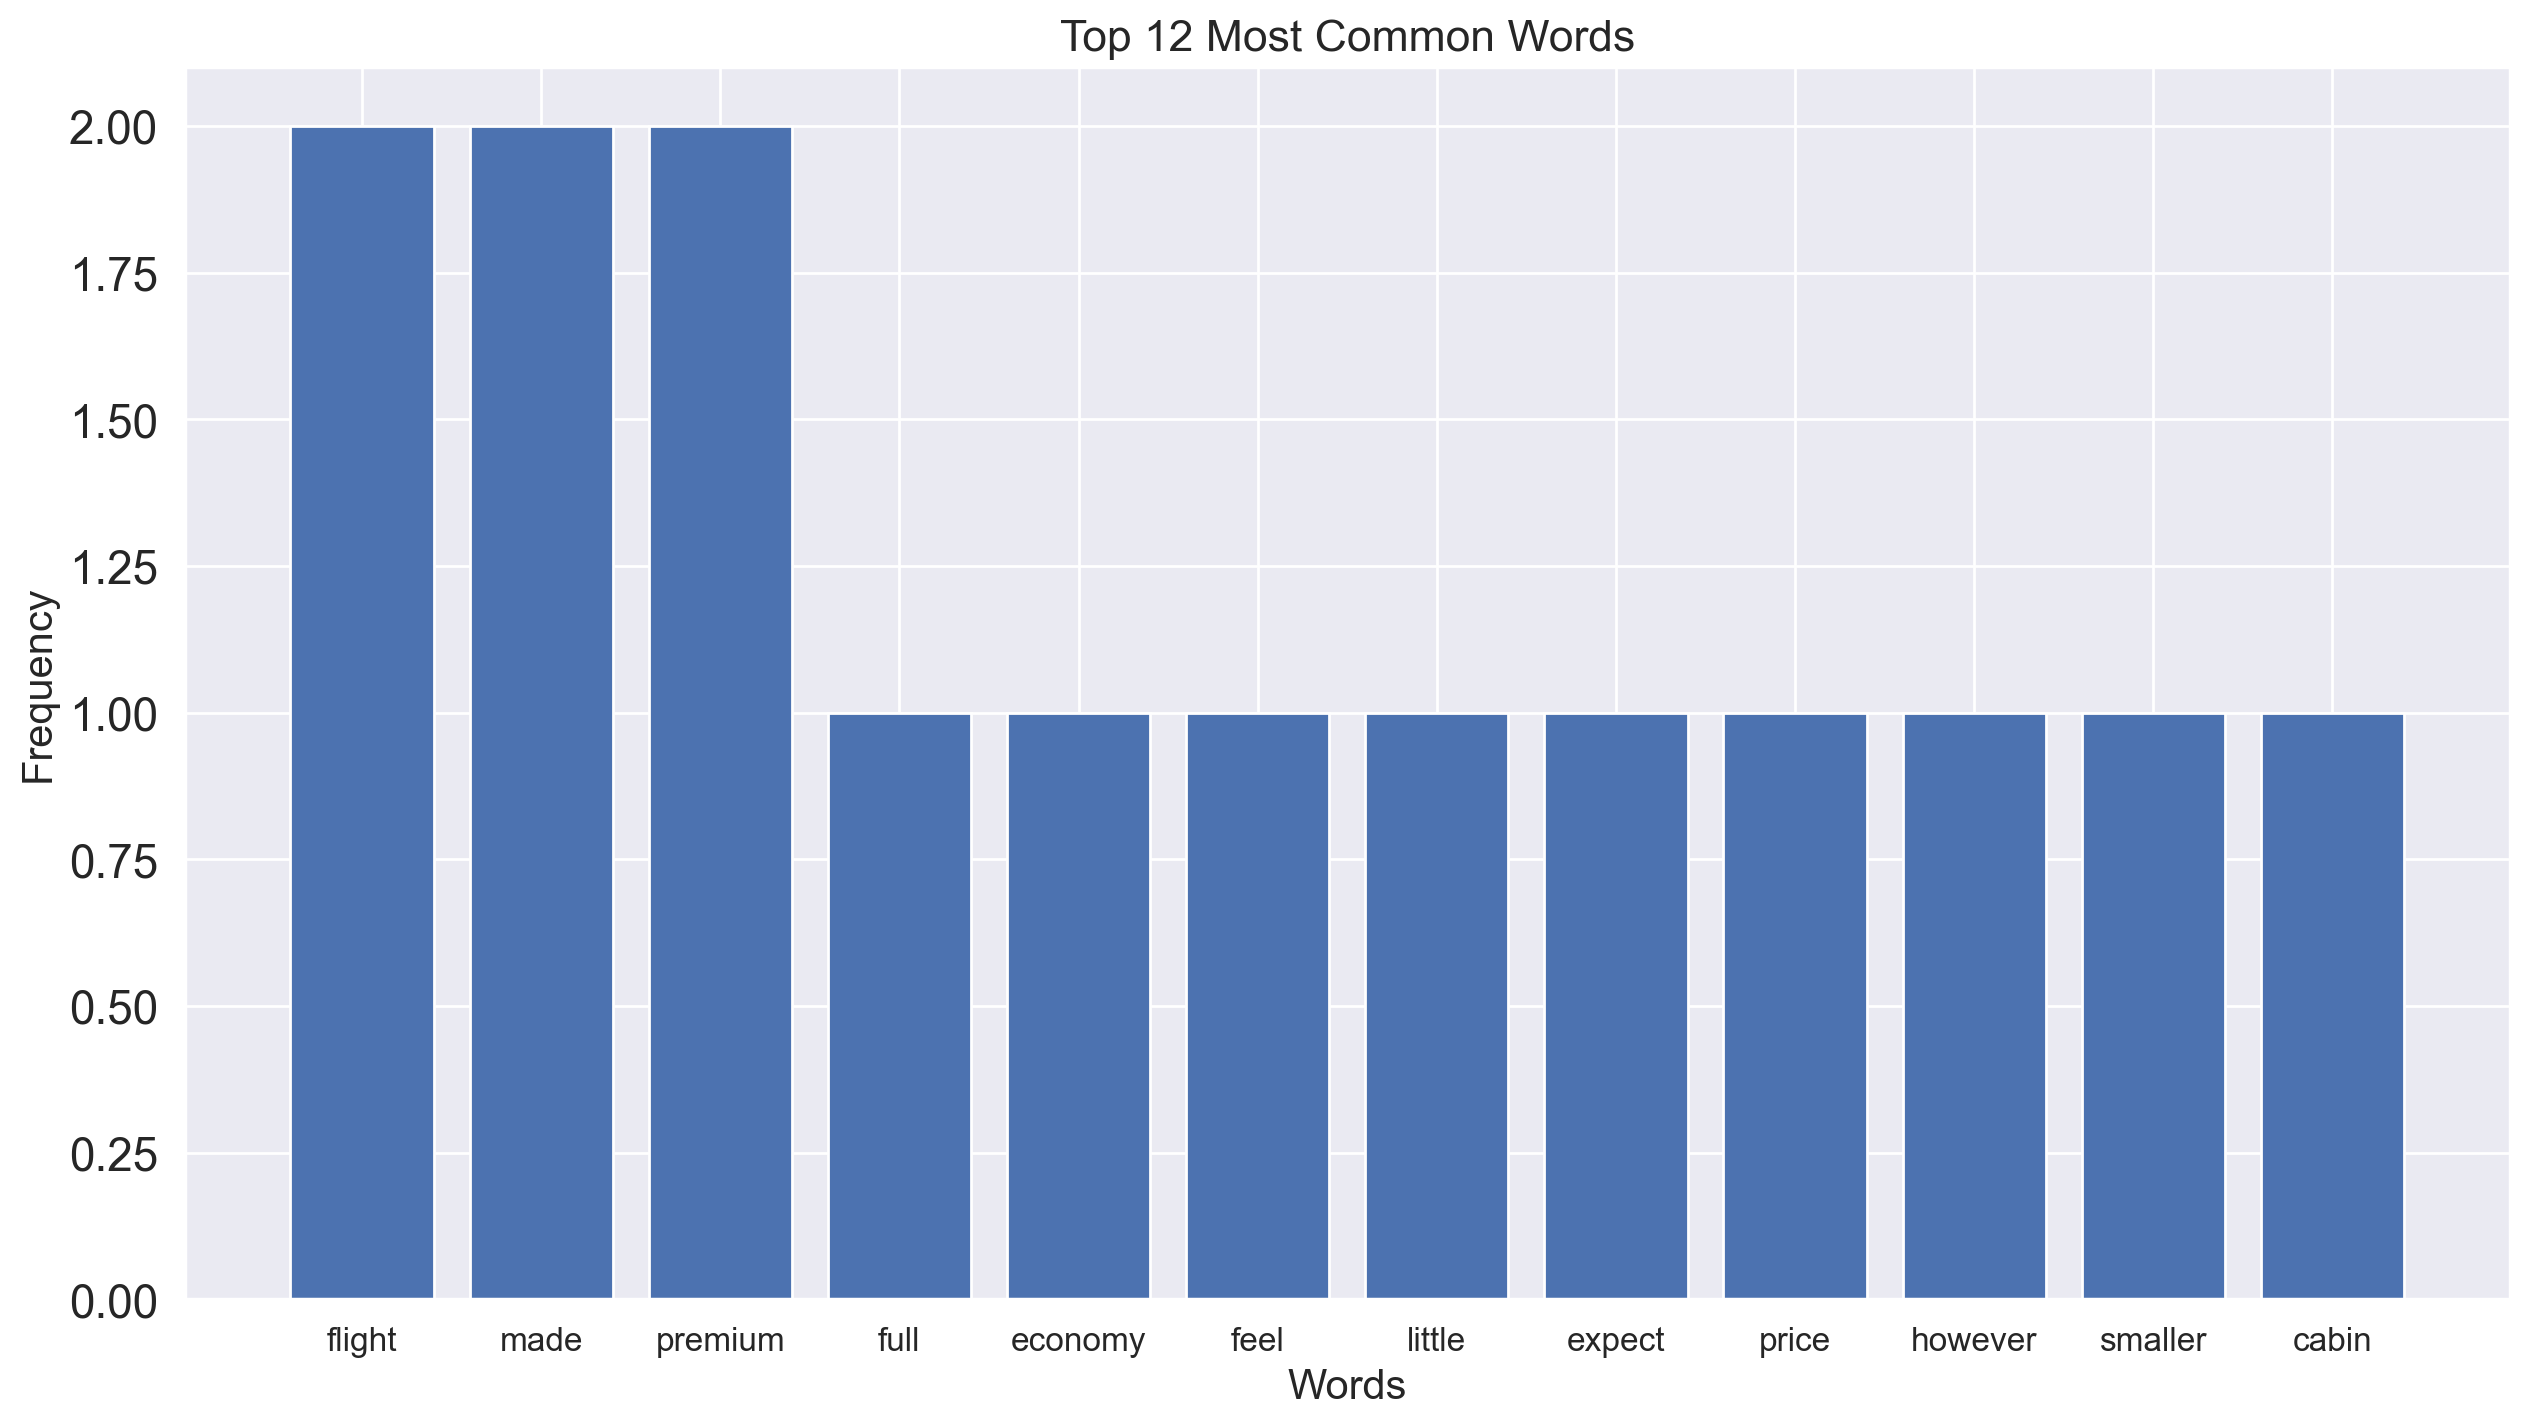

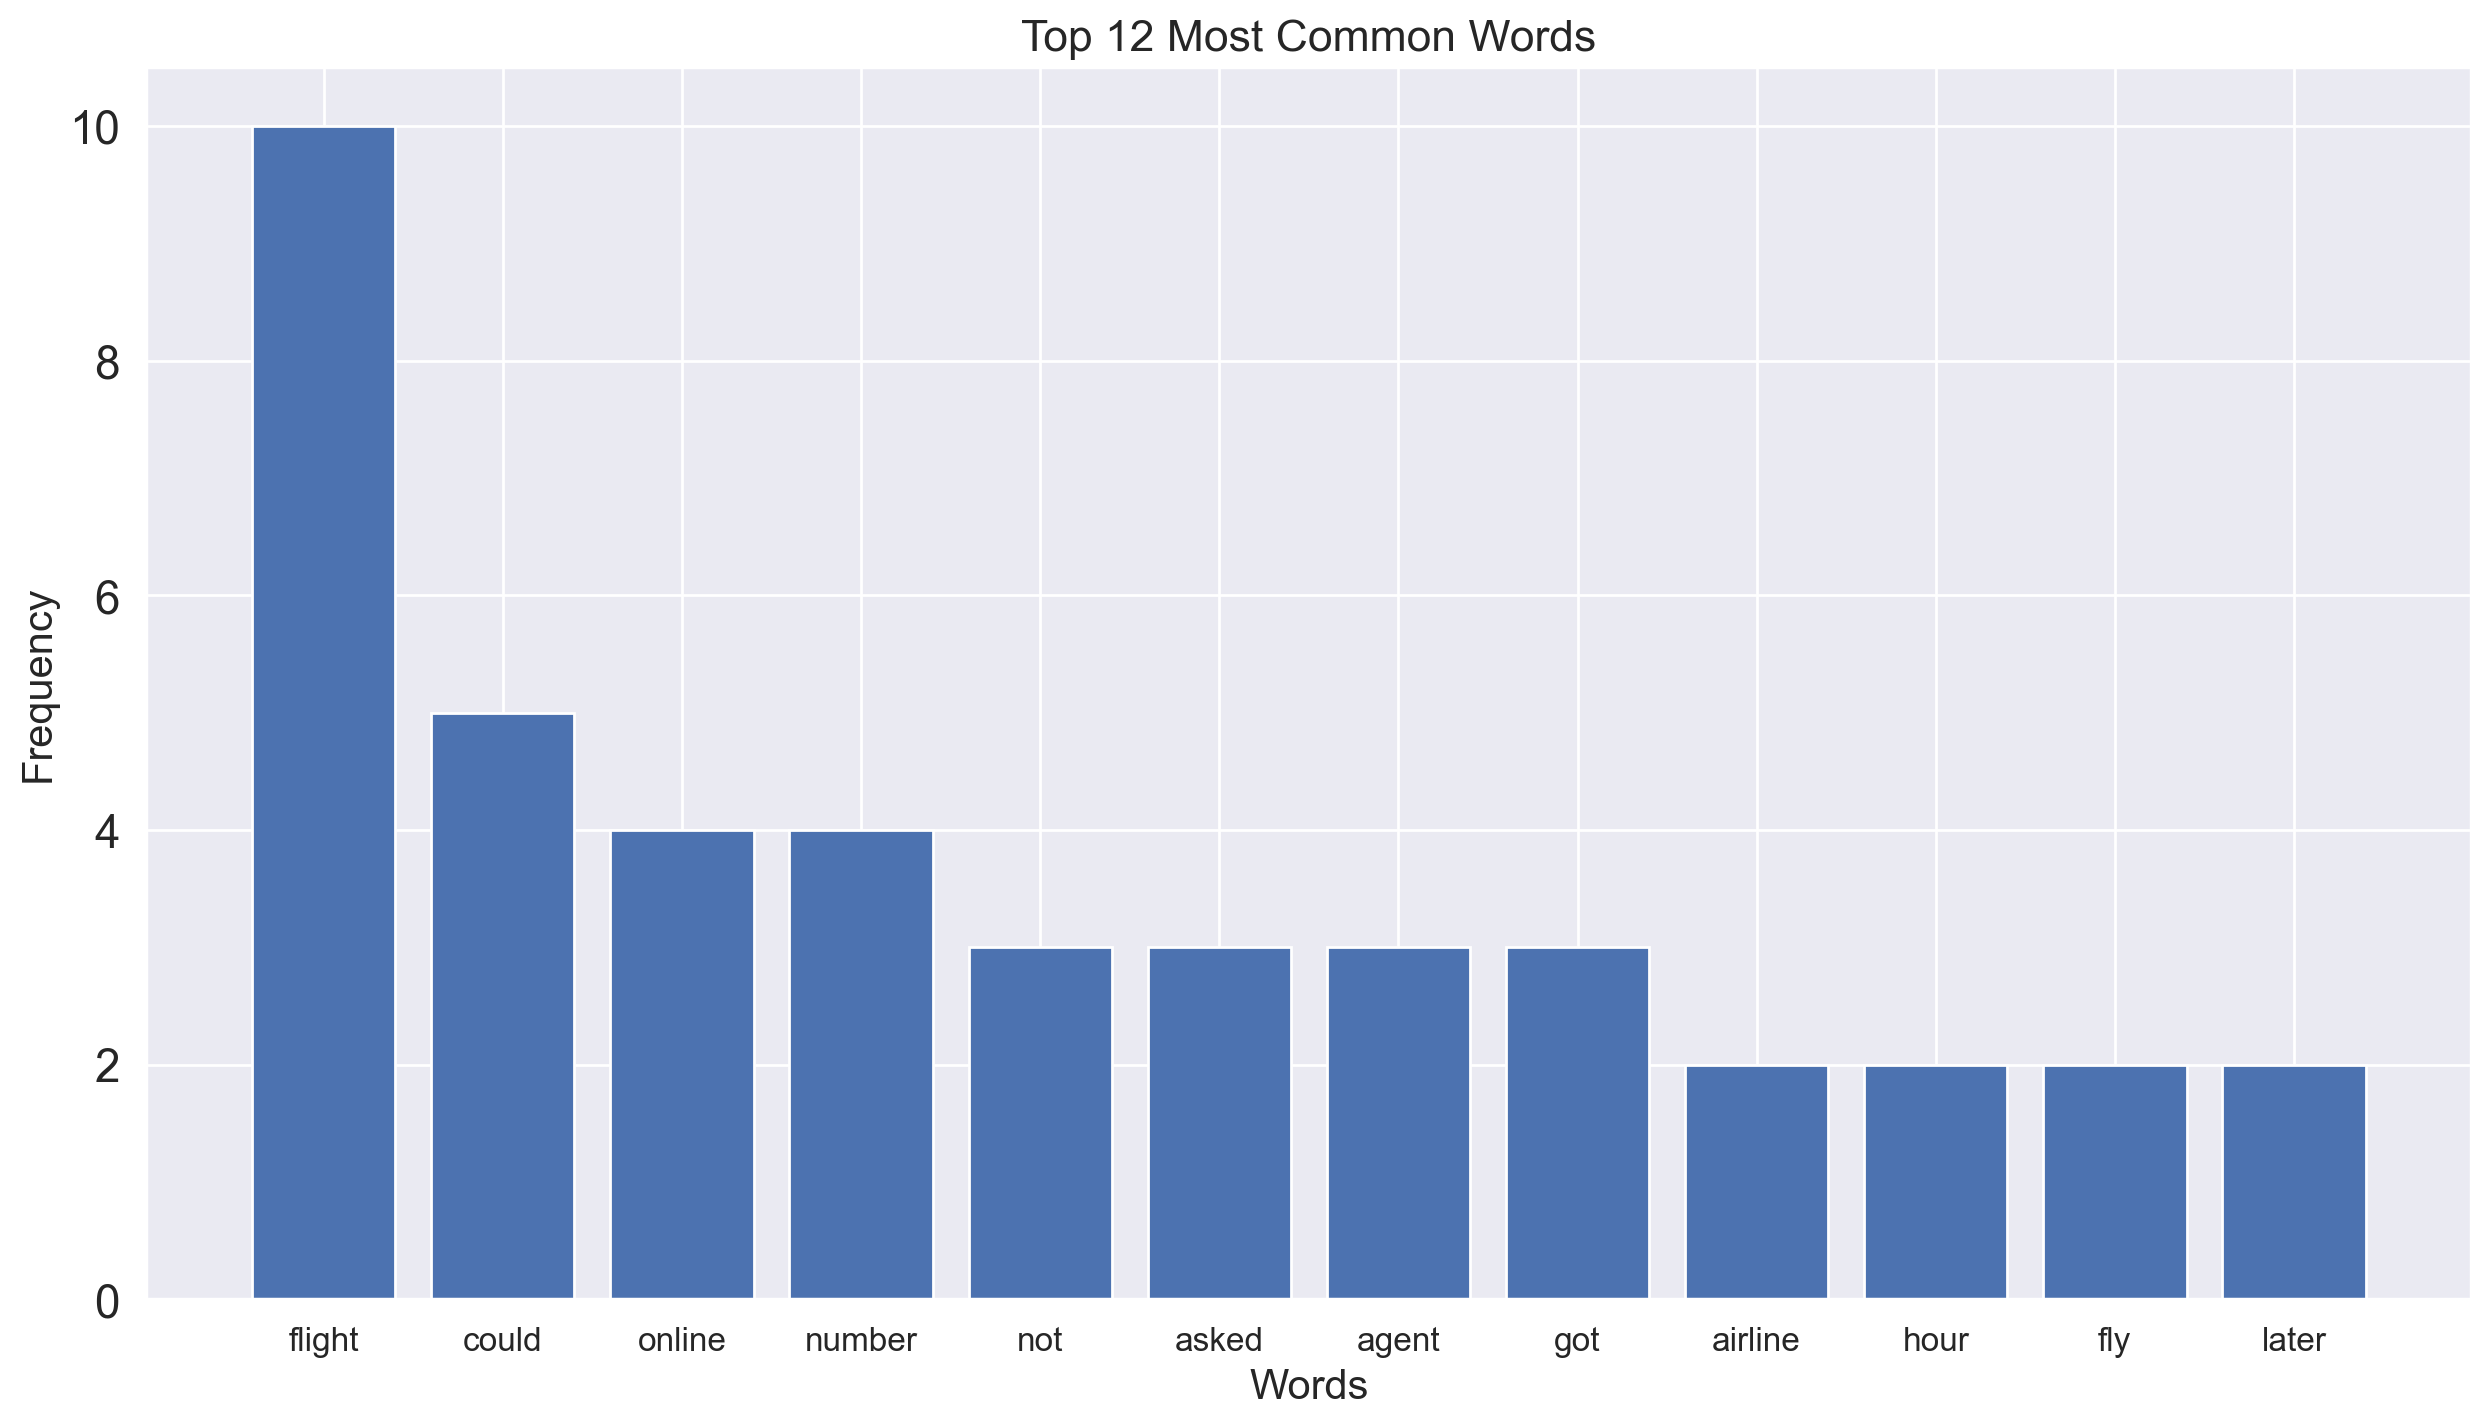

In [857]:
# Function to plot the most common words from a FreqDist
def plot_freq_dist(freq_Distribution, num_words=12):
    common_words = freq_Distribution.most_common(num_words)
    words, frequencies = zip(*common_words)

    plt.figure(figsize=(15, 8))
    plt.bar(words, frequencies)
    plt.xlabel('Words',fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=12)
    plt.title('Top {} Most Common Words'.format(num_words),fontsize=16)
    plt.show()


for index, row in df.head(5).iterrows():#In Python, the iterrows() method is a function provided by the pandas library.
#  #It is used to iterate over DataFrame rows as (index, Series) pairs. Here's a brief explanation of how it works:
  plot_freq_dist(row['Reviews'])

In [858]:
reviews['Reviews'] = reviews['Reviews'].apply(lambda txt: ' '.join(txt))
reviews['Reviews']

0       four pleasant time flight friendly helpful sta...
1       travel extensively year tend use regular trip ...
2       flight delayed hour due bad weather around jfk...
3       full flight made premium economy feel little p...
4       worst airline ever flown could not check fligh...
                              ...                        
3855    bmi regional operated flight manchester heathr...
3856    lhr ham purser address club passenger name boa...
3857    son worked british airway urged fly british ai...
3858    london citynew york jfk via shannon really nic...
3859    sinlhr first class old aircraft seat not priva...
Name: Reviews, Length: 3796, dtype: object

## Finding Subjectivity_Score

In [859]:
def get_Subjectivity(text):
  Subjectivity_s = TextBlob(str(text))
  return Subjectivity_s.sentiment.subjectivity


reviews['Subjectivity_Score'] = reviews['Reviews'].apply(get_Subjectivity)

In [860]:
reviews['Subjectivity_Score']

0       0.695238
1       0.392145
2       0.553526
3       0.481667
4       0.509375
          ...   
3855    0.363636
3856    0.428571
3857    0.256250
3858    0.440000
3859    0.509449
Name: Subjectivity_Score, Length: 3796, dtype: float64

close to 0 = objective content <br>
close to 1 = subjective content

In [861]:
vader_score = SentimentIntensityAnalyzer()

In [862]:
def calculating_compound_score():
    return [vader_score.polarity_scores(m)['compound'] for m in reviews['Reviews']]
    

reviews['Compound_Score'] = calculating_compound_score()
reviews['Compound_Score']

0       0.5759
1      -0.8548
2       0.7742
3       0.8957
4      -0.8531
         ...  
3855    0.6174
3856    0.7650
3857    0.7003
3858    0.8070
3859    0.1027
Name: Compound_Score, Length: 3796, dtype: float64

In [863]:
def Results(text):
  over_all = vader_score.polarity_scores(text)
  if over_all['compound'] >=0.05:
    return "Positive"
  elif over_all['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"


reviews['Overall Sentiment'] = reviews['Reviews'].apply(Results)

In [864]:
reviews['Overall Sentiment']

0       Positive
1       Negative
2       Positive
3       Positive
4       Negative
          ...   
3855    Positive
3856    Positive
3857    Positive
3858    Positive
3859    Positive
Name: Overall Sentiment, Length: 3796, dtype: object

In [865]:
reviews['Overall Sentiment'].value_counts().to_frame(name="OVERALL SENTIMENT")

OVERALL SENTIMENT
Overall Sentiment                   
Positive                        2311
Negative                        1385
Neutral                          100

In [866]:
reviews['Overall Sentiment'].value_counts()


Overall Sentiment
Positive    2311
Negative    1385
Neutral      100
Name: count, dtype: int64

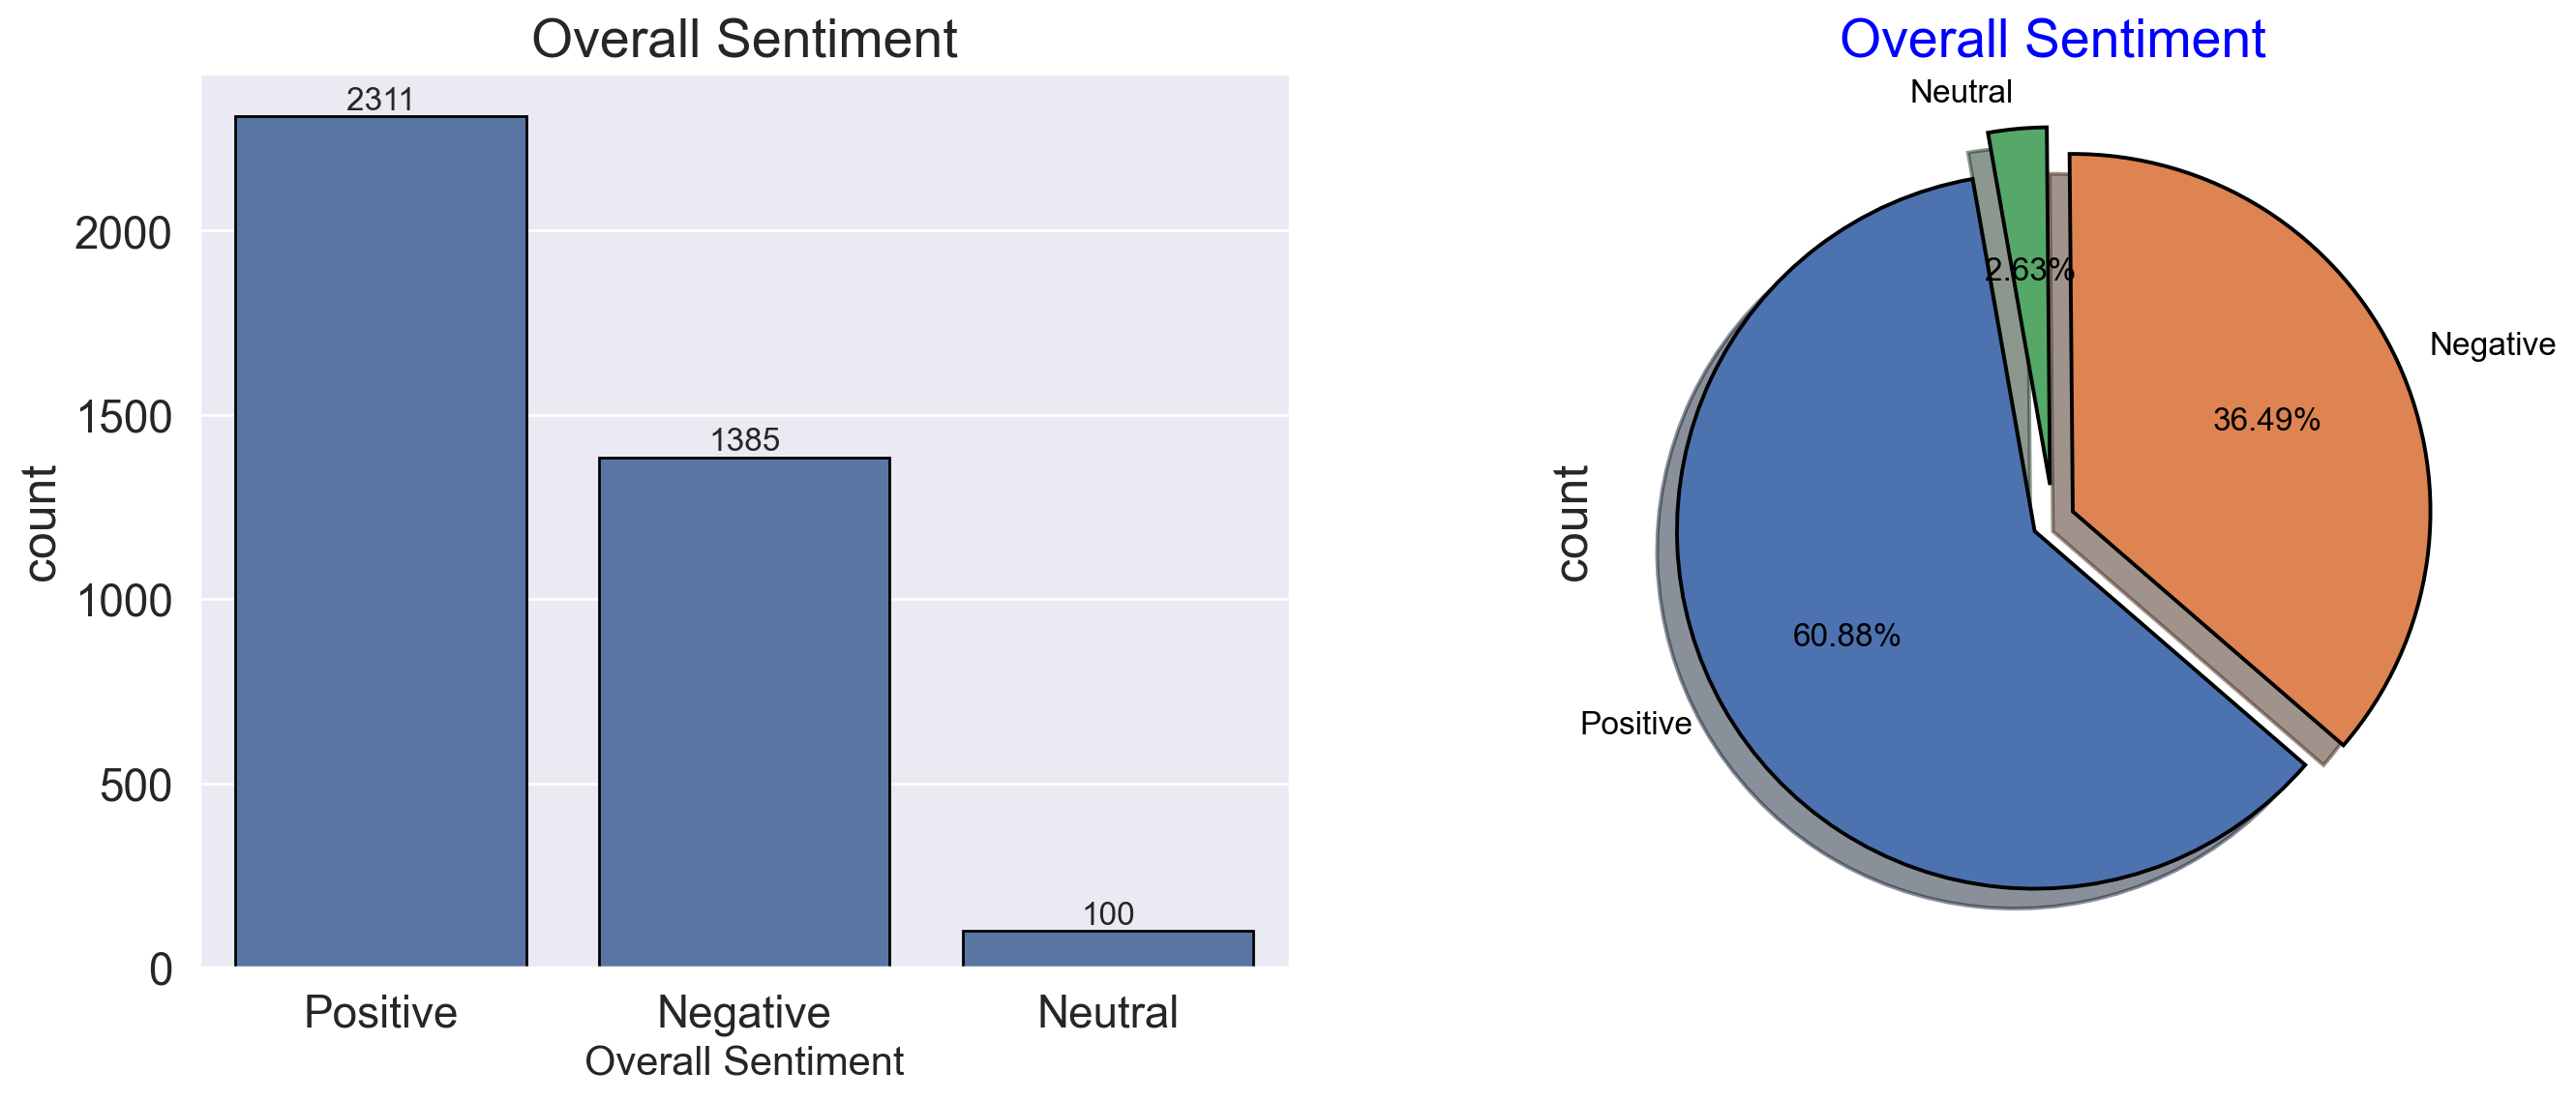

In [867]:
plt.figure(figsize=(16, 6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Overall Sentiment', data=reviews,edgecolor="black")
ax.bar_label(ax.containers[0],fontsize=12)
plt.title("Overall Sentiment", fontsize=20)
plt.xlabel('Overall Sentiment',fontsize=15)


ax = plt.subplot(1,2,2)
wedgeprops = {'edgecolor' : 'black', 'linewidth' : 1.4}
ax=reviews['Overall Sentiment'].value_counts().plot.pie(explode=[0.06, 0.06, 0.1],autopct='%1.2f%%',wedgeprops=wedgeprops,startangle=100,textprops={'color': 'black','fontsize':12},shadow=True);
ax.set_title(label = "Overall Sentiment", fontsize = 20,color='blue');

In [869]:
text = " ".join([j for j in reviews['Reviews']])

In [870]:
WC = WordCloud(background_color="white",contour_width = 2,
               contour_color = 'black',colormap = 'BuPu_r',
               max_words=500,max_font_size=150,width = 800, height = 500).generate(text)

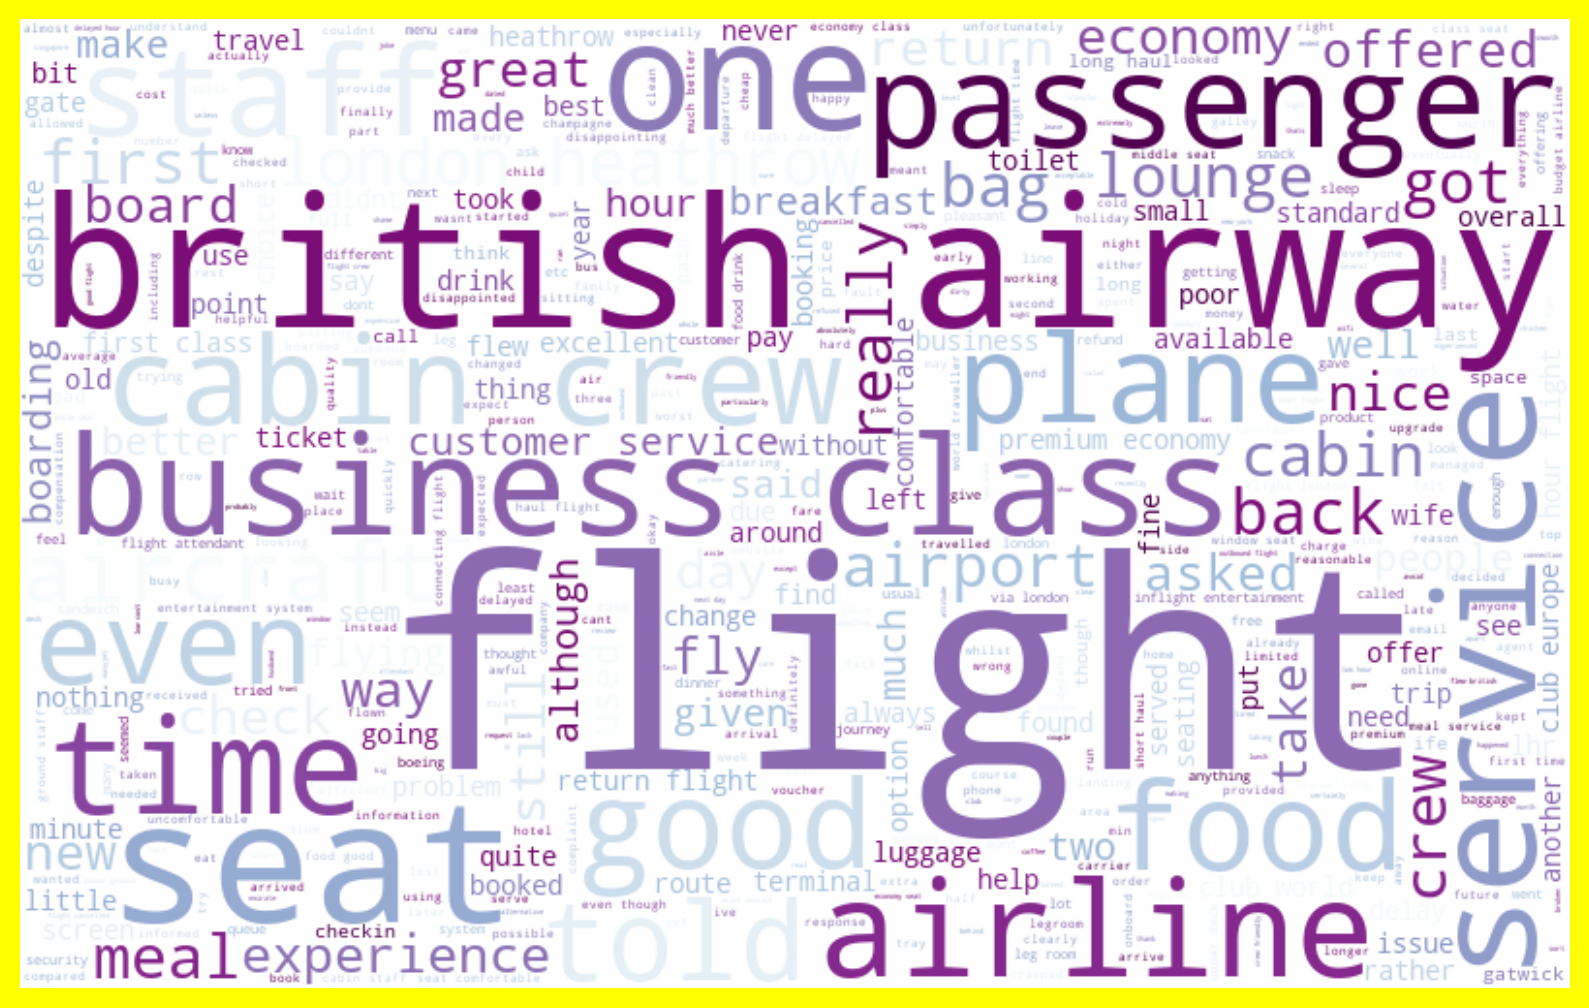

In [871]:
plt.figure(figsize=(10,8),facecolor="yellow")
plt.axis("off")
plt.imshow(WC,interpolation="bilinear")

In [872]:
Word_C = WordCloud(background_color="black",contour_width = 2,colormap = 'BuPu_r',
               max_words=1000,max_font_size=150,width = 800, height = 500).generate(text)

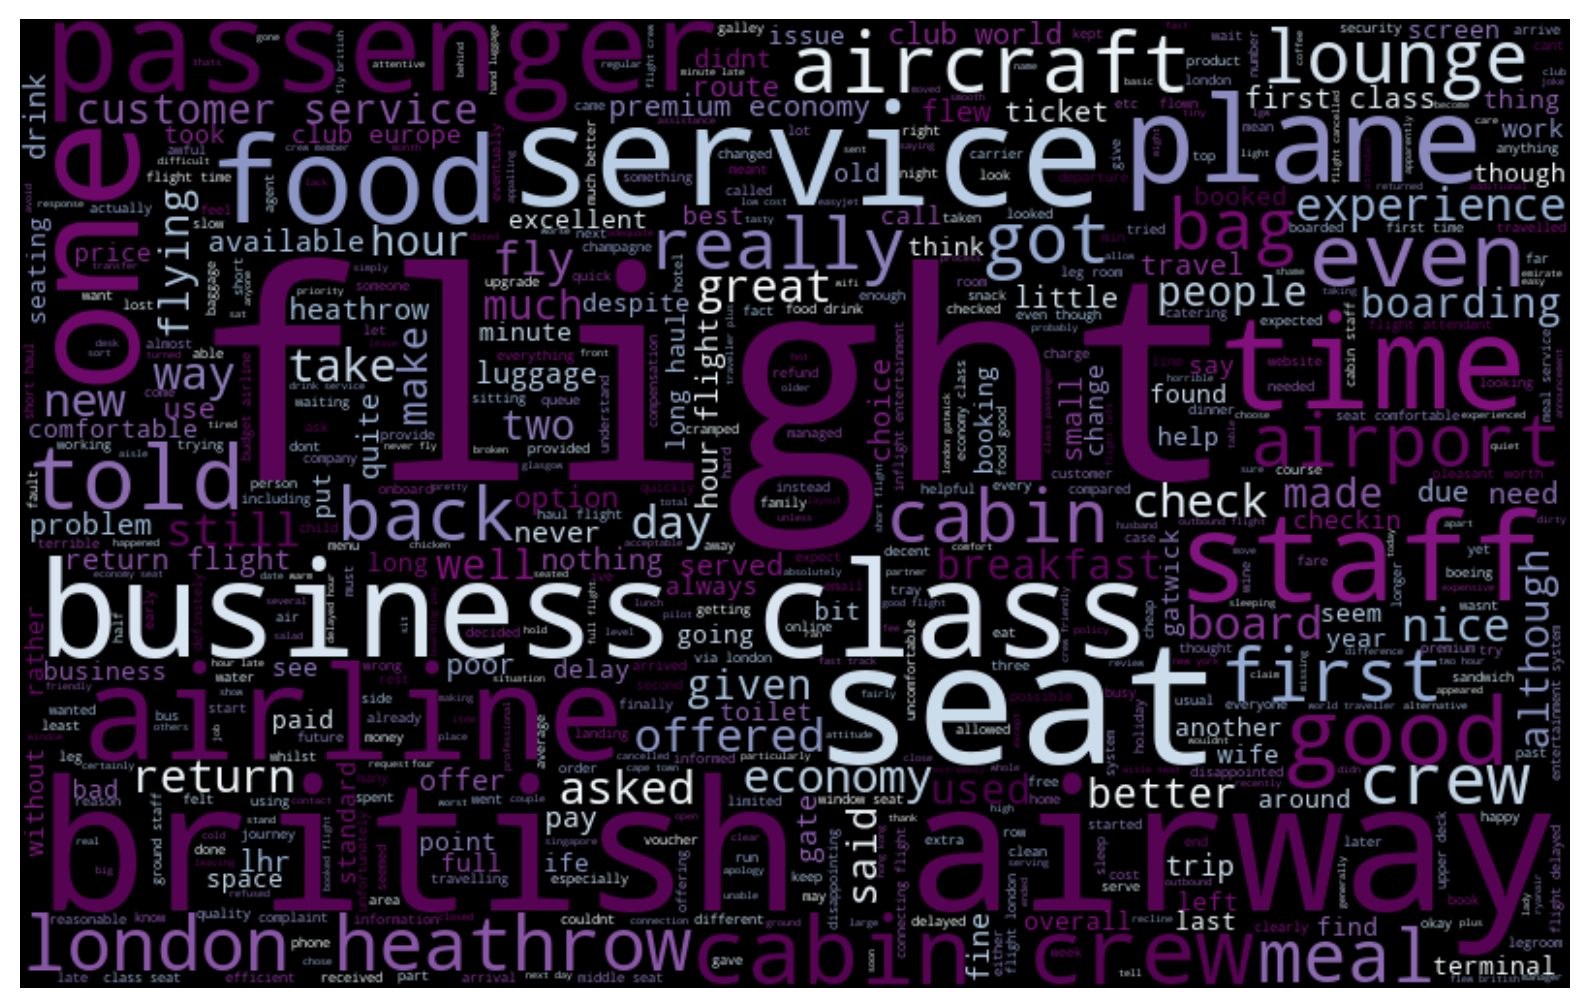

In [873]:
plt.figure(figsize=(10,8))
plt.imshow(Word_C,interpolation="bilinear")
plt.axis("off")
plt.show()